loading c1_20231009_nsub6_fit_dm.tt...
数据维度(nsub,nchan,nbin): (191, 256, 128)


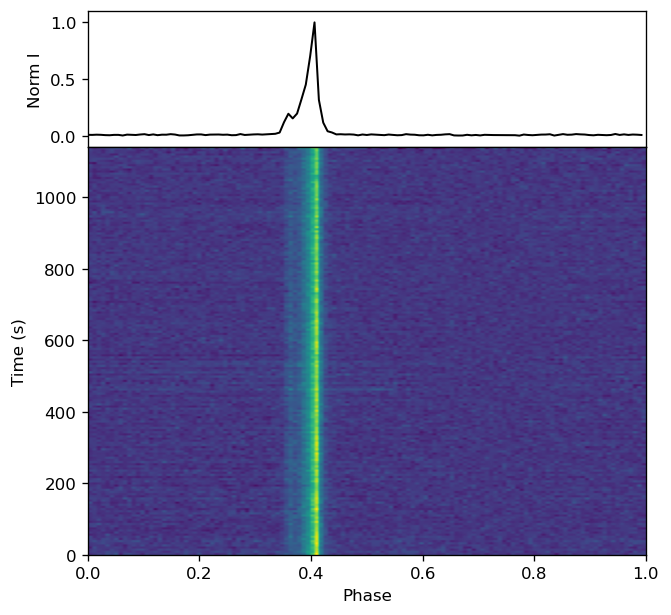

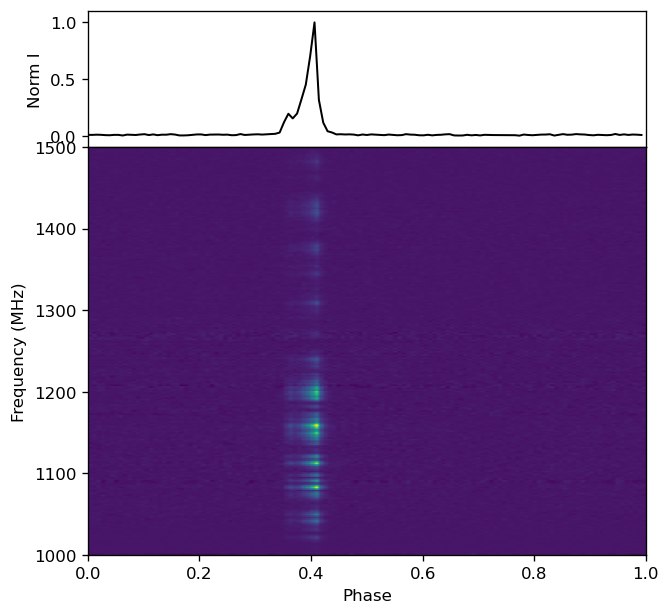

In [1]:
import time
import types
import psrchive
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

date = str(20231009)
source = "c1"
start = time.time() 
filename = f"{source}_{date}_nsub6_fit_dm.tt"
print(f"loading {filename}...")
 
ar = psrchive.Archive.load(filename)
ar.pscrunch() # 极化数据合并
#ar.tscrunch() # 时间积分合并
ar.bscrunch_to_nbin(128) #相位bin合并
ar.fscrunch_to_nchan(256) # 频率积分合并
#ar.dedisperse()
ar.remove_baseline()

data = ar.get_data()[:,  0, :, :]
print(f"数据维度(nsub,nchan,nbin): {data.shape}") 

I = data.squeeze()

# 去除rfi
mask_rfi = []
mask = np.ones(I.shape[0],  dtype=bool)
for start, end in mask_rfi: mask[start:end+1] = False 
I_masked = I.copy()
I_masked[~mask] = np.nan

# 归一化轮廓图和时域图的合成图
fig = plt.figure(figsize=(6, 6), dpi=120)
gs = GridSpec(2, 1, height_ratios=[1, 3], hspace=0)
    
# 归一化轮廓图（上方）
profile_ax = fig.add_subplot(gs[0])
nbin = I_masked.shape[-1]
norm_nbin = np.arange(nbin)/nbin
profile = np.nanmean(I_masked, axis=(0,1))
profile = (profile - np.nanmin(profile)) / (np.nanmax(profile) - np.nanmin(profile))
profile_ax.plot(norm_nbin, profile, color='k', lw=1.2)
profile_ax.set_ylabel('Norm I', fontsize=10)
profile_ax.set_ylim(-0.1, 1.1)
profile_ax.grid(axis='y', ls=':', alpha=0)
profile_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# 时域图（下方主图）
time_ax = fig.add_subplot(gs[1], sharex=profile_ax)
time_lo = ar.get_Integration(0).get_start_time().in_days() *86400 - ar.get_Integration(0).get_start_time().in_days()*86400
nsub = data.shape[0] 
time_hi = ar.get_Integration(nsub-1).get_start_time().in_days() * 86400 - ar.get_Integration(0).get_start_time().in_days()*86400
time_ax.imshow(I_masked.mean(1), extent=(0,nbin/nbin,time_lo,time_hi), origin='lower', aspect='auto')
# time_ax.imshow(data[:,0,:,:].mean(1), origin='lower', aspect='auto')
time_ax.set_xlabel('Phase', fontsize=10)
time_ax.set_ylabel('Time (s)', fontsize=10)
plt.savefig("Time_phase.png", bbox_inches='tight', dpi=300)

# 归一化轮廓图和频域图的合成图
fig = plt.figure(figsize=(6, 6), dpi=120)
gs = GridSpec(2, 1, height_ratios=[1, 3], hspace=0)
    
# 归一化轮廓图（上方）
profile_ax = fig.add_subplot(gs[0])
nbin = I_masked.shape[-1]
norm_nbin = np.arange(nbin)/nbin
profile = np.nanmean(I_masked, axis=(0,1))
profile = (profile - np.nanmin(profile)) / (np.nanmax(profile) - np.nanmin(profile))
profile_ax.plot(norm_nbin, profile, color='k', lw=1.2)
profile_ax.set_ylabel('Norm I', fontsize=10)
profile_ax.set_ylim(-0.1, 1.1)
profile_ax.grid(axis='y', ls=':', alpha=0)
profile_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# 时域图（下方主图）
freq_ax = fig.add_subplot(gs[1], sharex=profile_ax)
freq_lo = ar.get_centre_frequency() - ar.get_bandwidth()/2.0
freq_hi = ar.get_centre_frequency() + ar.get_bandwidth()/2.0
plt.imshow(I_masked.mean(0), extent=(0,nbin/nbin,freq_lo,freq_hi), origin='lower', aspect='auto')
plt.xlabel('Phase')
plt.ylabel('Frequency (MHz)')
plt.savefig("Freq_phase.png", bbox_inches='tight', dpi=300)

Loading C1_data/c1_20250905_nsub6_fit_dm_fit_par_2.TT.pazi ...
Data shape (nsub, nchan, nbin): (593, 128, 128)


Text(0, 0.5, 'Frequency channels')

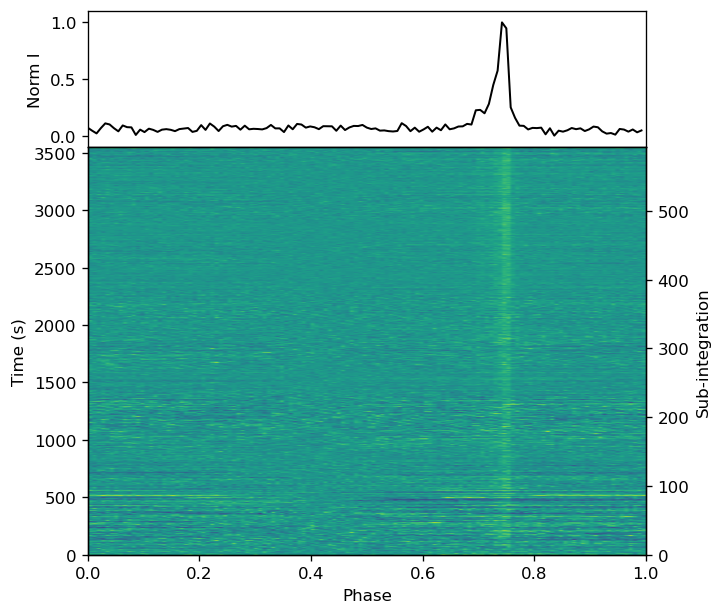

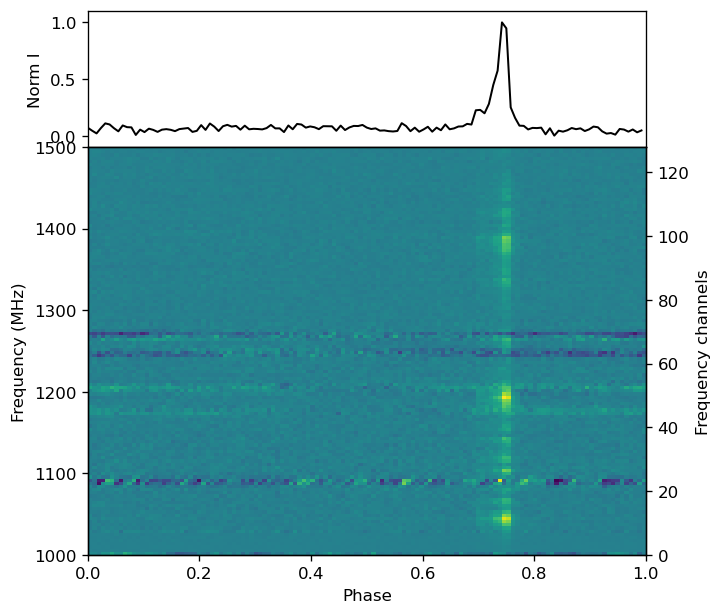

In [7]:
import time
import types
import psrchive
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

filename = "C1_data/c1_20250905_nsub6_fit_dm_fit_par_2.TT.pazi" 
phase_bins = 128  # 合并后的相位 bin 数

print(f"Loading {filename} ...")
ar = psrchive.Archive.load(filename)
ar.pscrunch()                  # 合并极化
ar.bscrunch_to_nbin(phase_bins)  # 合并相位 bin
ar.fscrunch_to_nchan(128)     # 合并频率
ar.remove_baseline()           # 去掉基线

data = ar.get_data()[:, 0, :, :]   # 取第一个极化
I = data.squeeze()                 # shape (nsub, nchan, nbin)
print(f"Data shape (nsub, nchan, nbin): {I.shape}")

# 时域屏蔽（子积分屏蔽）
mask_rfi = []
#mask_rfi = []
mask_time = np.ones(I.shape[0], dtype=bool)
for start, end in mask_rfi:
    mask_time[start:end+1] = False

# 频率域屏蔽（通道屏蔽）
#freq_rfi = [(22,23), (52,53), (44,45), (67,69),(62,64)]
freq_rfi = []
mask_freq = np.ones(I.shape[1], dtype=bool)
for fstart, fend in freq_rfi:
    mask_freq[fstart:fend+1] = False

# 只做时域屏蔽（用于 phase vs time）
I_time_masked = I.copy()
I_time_masked[~mask_time, :, :] = np.nan

# 只做频域屏蔽（用于 phase vs freq）
I_freq_masked = I.copy()
I_freq_masked[:, ~mask_freq, :] = np.nan

# 归一化轮廓图和时域图的合成图
fig = plt.figure(figsize=(6, 6), dpi=120)
gs = GridSpec(2, 1, height_ratios=[1, 3], hspace=0)
    
# 归一化轮廓图（上方）
profile_ax = fig.add_subplot(gs[0])
nbin = I_time_masked.shape[-1]
norm_nbin = np.arange(nbin)/nbin
profile = np.nanmean(I_time_masked, axis=(0,1))
profile = (profile - np.nanmin(profile)) / (np.nanmax(profile) - np.nanmin(profile))
profile_ax.plot(norm_nbin, profile, color='k', lw=1.2)
profile_ax.set_ylabel('Norm I', fontsize=10)
profile_ax.set_ylim(-0.1, 1.1)
profile_ax.grid(axis='y', ls=':', alpha=0)
profile_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# 时域图（下方主图）
time_ax = fig.add_subplot(gs[1], sharex=profile_ax)
time_lo = ar.get_Integration(0).get_start_time().in_days() *86400 - ar.get_Integration(0).get_start_time().in_days()*86400
nsub = data.shape[0] 
time_hi = ar.get_Integration(nsub-1).get_start_time().in_days() * 86400 - ar.get_Integration(0).get_start_time().in_days()*86400
time_ax.imshow(I_time_masked.mean(1), extent=(0, nbin/nbin,time_lo,time_hi), origin='lower', aspect='auto')
# time_ax.imshow(data[:,0,:,:].mean(1), origin='lower', aspect='auto')
time_ax.set_xlabel('Phase', fontsize=10)
time_ax.set_ylabel('Time (s)', fontsize=10)

# 添加右侧坐标轴显示子积分数
time_ax2 = time_ax.twinx()
time_ax2.set_ylim(0, nsub)
time_ax2.set_ylabel('Sub-integration', fontsize=10)

# 归一化轮廓图和频域图的合成图
fig = plt.figure(figsize=(6, 6), dpi=120)
gs = GridSpec(2, 1, height_ratios=[1, 3], hspace=0)
    
# 归一化轮廓图（上方）
profile_ax = fig.add_subplot(gs[0])
nbin = I_freq_masked.shape[-1]
norm_nbin = np.arange(nbin)/nbin
profile = np.nanmean(I_freq_masked, axis=(0,1))
profile = (profile - np.nanmin(profile)) / (np.nanmax(profile) - np.nanmin(profile))
profile_ax.plot(norm_nbin, profile, color='k', lw=1.2)
profile_ax.set_ylabel('Norm I', fontsize=10)
profile_ax.set_ylim(-0.1, 1.1)
profile_ax.grid(axis='y', ls=':', alpha=0)
profile_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# 时域图（下方主图）
freq_ax = fig.add_subplot(gs[1], sharex=profile_ax)
freq_lo = ar.get_centre_frequency() - ar.get_bandwidth()/2.0
freq_hi = ar.get_centre_frequency() + ar.get_bandwidth()/2.0
plt.imshow(I_freq_masked.mean(0), extent=(0, nbin/nbin,freq_lo,freq_hi), origin='lower', aspect='auto')
plt.xlabel('Phase')
plt.ylabel('Frequency (MHz)')

# 添加右侧坐标轴显示频率通道数
nchan = I_freq_masked.shape[1]
freq_ax2 = freq_ax.twinx()
freq_ax2.set_ylim(0, nchan)
freq_ax2.set_ylabel('Frequency channels', fontsize=10)

freq_step is 100 MHz


Text(0, 0.5, 'Frequency (MHz)')

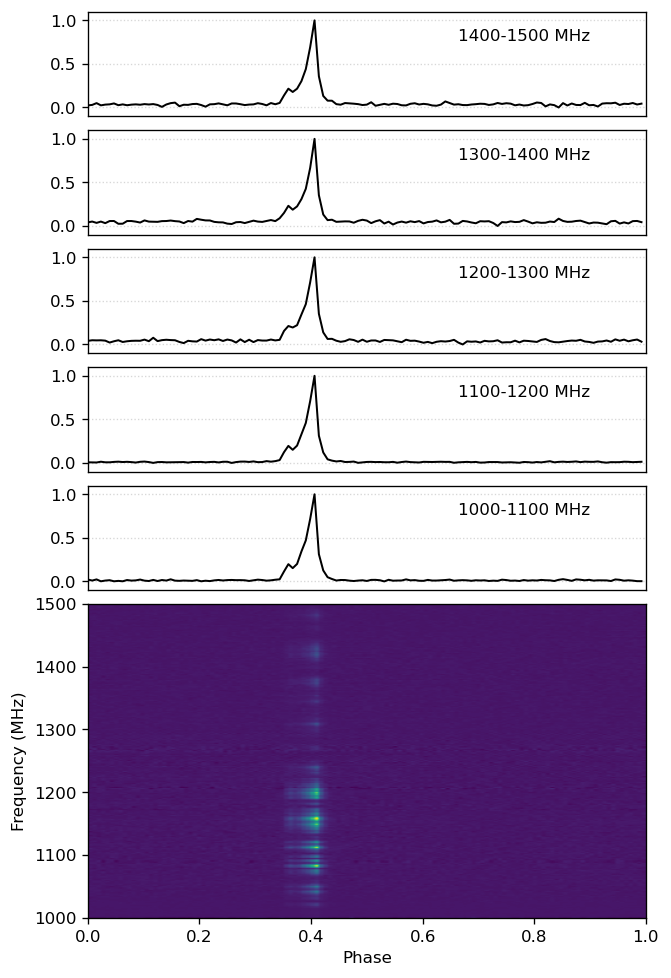

In [2]:
# 归一化轮廓图和频域图的合成图
fig = plt.figure(figsize=(6, 10), dpi=120)
gs = GridSpec(6, 1, height_ratios=[1]*5 + [3], hspace=0.1)  # 5个频段子图 + 1个频域图

# 获取总频率范围
freq_lo = ar.get_centre_frequency() - ar.get_bandwidth()/2.0
freq_hi = ar.get_centre_frequency() + ar.get_bandwidth()/2.0
nchan = data.shape[1]  # 总频率通道数

# 将总带宽均分为5份
freq_step = (freq_hi - freq_lo) / 5
print(f"freq_step is {freq_step:.0f} MHz")
for i in range(5):
    # 计算当前子频段的频率范围
    sub_freq_lo = freq_lo + i * freq_step
    sub_freq_hi = freq_lo + (i+1) * freq_step
    
    # 获取频率数组并找到对应的通道索引
    freq_array = ar.get_frequencies()
    chan_idx_lo = np.argmin(np.abs(freq_array - sub_freq_lo))
    chan_idx_hi = np.argmin(np.abs(freq_array - sub_freq_hi))
    chan_idx_lo, chan_idx_hi = sorted([chan_idx_lo, chan_idx_hi])
    
    # 提取当前子频段的数据
    sub_I_masked = I_masked[:, chan_idx_lo:chan_idx_hi+1, :]
    
    # 生成归一化轮廓
    profile = np.nanmean(sub_I_masked, axis=(0, 1))
    if np.nanmax(profile) != np.nanmin(profile):
        profile = (profile - np.nanmin(profile)) / (np.nanmax(profile) - np.nanmin(profile))
    else:
        profile = np.zeros_like(profile)
    
    # 绘制子频段轮廓图
    profile_ax = fig.add_subplot(gs[4 - i])
    nbin = sub_I_masked.shape[-1]
    norm_nbin = np.arange(nbin)/nbin
    profile_ax.plot(norm_nbin, profile, color='k', lw=1.2)
    #profile_ax.set_ylabel(f'{sub_freq_lo:.0f}-{sub_freq_hi:.0f} MHz', fontsize=8)
    # 标注频率范围
    profile_ax.text(0.90, 0.90, f'{sub_freq_lo:.0f}-{sub_freq_hi:.0f} MHz', fontsize=10, color='black', ha='right', va='top')
    profile_ax.set_xlim(0, 1)
    profile_ax.set_ylim(-0.1, 1.1)
    profile_ax.grid(axis='y', ls=':', alpha=0.5)
    profile_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# 频域图（下方主图）
freq_ax = fig.add_subplot(gs[5], sharex=profile_ax)
plt.imshow(I_masked.mean(0), extent=(0, nbin/nbin, freq_lo, freq_hi), origin='lower', aspect='auto')
plt.xlabel('Phase')
plt.ylabel('Frequency (MHz)')

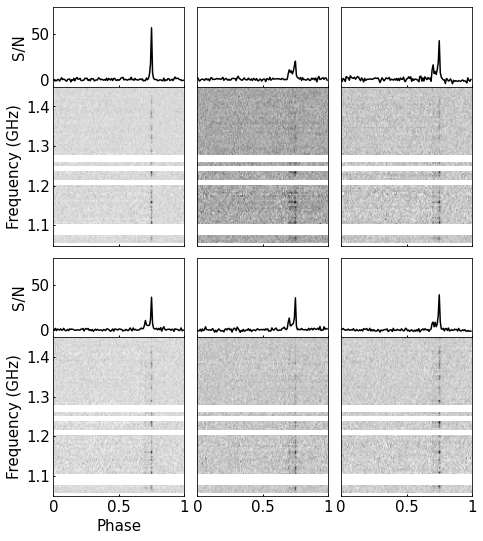

In [3]:
import time
import psrchive
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mticker

# 文件列表
filenames = [
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232230769.ar",
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232232476.ar",
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232232384.ar",
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232229070.ar",
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232237833.ar",
    "/mnt/c/Users/陈语杰/Desktop/ar_single_test/SNR_35-100/pulse_232226315.ar"
]

# 创建图形
fig = plt.figure(figsize=(7.5, 9))
gs_outer = gridspec.GridSpec(2, 3, figure=fig, hspace=0.05, wspace=0.1)

# ---------- 计算第一幅图最大S/N，用于统一纵轴 ----------
first_max_sn = None

for idx, filename in enumerate(filenames):
    # ---------- 数据加载与处理 ----------
    ar = psrchive.Archive.load(filename)
    ar.pscrunch()
    ar.bscrunch_to_nbin(128)
    ar.fscrunch_to_nchan(128)
    ar.dedisperse()
    ar.remove_baseline()

    data = ar.get_data()[:, 0, :, :]
    I = data.squeeze()

    # RFI掩码
    mask_rfi = [(0, 13), (0,1), (6, 7), (20, 25), (52, 53), (61,62), (67, 69), (115, 128)]
    mask = np.ones(I.shape, dtype=bool)
    for start, end in mask_rfi:
        mask[start:end+1] = False
    I_masked = I.copy()
    I_masked[~mask] = np.nan

    # 相位区
    nbin = I_masked.shape[-1]
    on_mask = np.arange(90, 100)
    off_mask = np.r_[50:60]

    # ---------- Handbook SNR ----------
    profile = np.nanmean(I_masked, axis=0)
    on_data = profile[on_mask][~np.isnan(profile[on_mask])]
    off_data = profile[off_mask][~np.isnan(profile[off_mask])]

    μ_off = np.mean(off_data)
    σ_off = np.std(off_data, ddof=1)
    snr = np.sum(on_data - μ_off) / (σ_off * np.sqrt(len(on_data))) if σ_off > 0 else np.nan

    if idx == 0:
        first_max_sn = np.max((profile - μ_off) / σ_off)

    # ---------- Handbook W50 ----------
    period = ar.get_Integration(0).get_folding_period()
    ms_per_bin = (period * 1000) / nbin

    peak_val = np.max(profile[on_mask])
    half_max = peak_val / 2.0

    on_profile = profile[on_mask]
    crossings = np.where(np.diff((on_profile > half_max).astype(int)) != 0)[0]

    if len(crossings) >= 2:
        left_idx = crossings[0] + on_mask[0]
        right_idx = crossings[-1] + on_mask[0]

        def interp_cross(idx):
            y1, y2 = profile[idx], profile[idx+1]
            x1, x2 = idx, idx+1
            return x1 + (half_max - y1) * (x2 - x1) / (y2 - y1)

        phi_l = interp_cross(left_idx)
        phi_r = interp_cross(right_idx)
        w50_ms = (phi_r - phi_l) * ms_per_bin
    else:
        w50_ms = np.nan

    # ---------- 脉冲能量 ----------
    e_on = np.trapz(on_data - μ_off) * ms_per_bin
    e_off = np.trapz(off_data - μ_off) * ms_per_bin

    # ---------- 当前格子的GridSpec（内部分上下子图） ----------
    row, col = divmod(idx, 3)
    gs_inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_outer[row, col], height_ratios=[1, 2], hspace=0)

    # ---------- 上子图：归一化轮廓 ----------
    ax1 = fig.add_subplot(gs_inner[0])
    x = np.arange(nbin) / nbin
    norm_profile = (profile - μ_off) / σ_off
    ax1.plot(x, norm_profile, color='black', lw=1.5)
    ax1.set_xlim(0, 1.0)
    ax1.set_ylim(-8, first_max_sn * 1.4)  # 统一纵轴，不动
    ax1.tick_params(axis='y', which='both', bottom=True, labelsize=15, direction='in', length=2, width=1)

    # ---------- 下子图：相位-频率 ----------
    ax2 = fig.add_subplot(gs_inner[1])
    freq_lo = (ar.get_centre_frequency() - ar.get_bandwidth()/2.0) / 1000 #转换到GHz
    freq_hi = (ar.get_centre_frequency() + ar.get_bandwidth()/2.0) / 1000 #转换到GHz
    ax2.imshow(I_masked, extent=(0, nbin/nbin, freq_lo, freq_hi), origin='lower', aspect='auto', cmap='gray_r')
    ax2.set_xlim(0, 1.0)
    #ax2.set_ylim(1048, 1450)
    ax2.set_ylim(freq_lo + 0.048, freq_hi - 0.05)

    # ---------- 修改横坐标显示 ----------
    if row == 0:
        # 第一行上、下子图：只显示刻度线，不显示数字，刻度朝内
        ax1.tick_params(axis='x', which='both', bottom=True, labelbottom=False, labelsize=15, direction='in', length=2, width=1)
        ax2.tick_params(axis='x', which='both', bottom=True, labelbottom=False, labelsize=15, direction='in', length=2, width=1)
    elif row == 1:
        # 第二行上子图：只显示刻度线，不显示数字
        ax1.tick_params(axis='x', which='both', bottom=True, labelbottom=False, labelsize=15, direction='in', length=2, width=1)
        if col == 0:
            # 第二行第一列下子图：显示刻度和标签
            ax2.set_xlabel('Phase', fontsize=15)
            ax2.tick_params(axis='x', which='both', bottom=True, labelsize=15, direction='in', length=2, width=1)
        else:
            # 第二行其他格子下子图：只显示刻度线，不显示数字
            ax2.tick_params(axis='x', which='both', bottom=True, direction='in', labelsize=15, length=2, width=1)

    # ---------- 左侧第一列显示纵坐标标签 ----------
    if col == 0:
        ax1.set_ylabel('S/N', fontsize=15)
        ax2.set_ylabel('Frequency (GHz)', fontsize=15)
        ax2.tick_params(axis='y', which='both', bottom=True, labelsize=15, direction='in', length=2, width=1)
    else:
        ax1.yaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        ax2.set_xlabel('')

    # ---------- 上子图横坐标刻度 ----------
    ax1.xaxis.set_major_locator(mticker.FixedLocator([0, 0.5, 1]))
    ax1.xaxis.set_major_formatter(mticker.FixedFormatter(['0', '0.5', '1']))

    # ---------- 下子图横坐标刻度 ----------
    ax2.xaxis.set_major_locator(mticker.FixedLocator([0, 0.5, 1]))
    ax2.xaxis.set_major_formatter(mticker.FixedFormatter(['0', '0.5', '1']))

plt.savefig("single_SNR_multi_2x3.png", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
# 计算FAST流量密度上限
import numpy as np

# 参数
T_sys = 22.0
G = 16.1
n_p = 2
delta_f = 100e6
beta = 1.0

P = 0.118710250694701 # s
W = 0.00185 #0.00143  # s
SNR = 295
T_obs = 3600  # s

# 计算脉冲宽度因子
width_factor = np.sqrt(W / (P - W))

# 计算流量密度（Jy）
S_flux_Jy = beta * SNR * T_sys / (G * np.sqrt(n_p * T_obs * delta_f)) * width_factor

# 转换为 mJy
S_flux_mJy = S_flux_Jy * 1e6
S_flux_mJy

print(f"FAST limit flux density = {S_flux_mJy:.3f} μJy")

FAST limit flux density = 59.773 μJy


In [6]:
# 计算Effelsberg流量密度上限
import numpy as np

# 参数
T_sys = 25
G = 1.5
n_p = 2
delta_f = 240e6
beta = 1.01

P = 0.118710250694701 # s
W = 0.00143  # s
SNR = 8
#T_obs = 600  # 4*3600 s
T_obs = 4*3600  # 4*3600 s

# 计算脉冲宽度因子
width_factor = np.sqrt(W / (P - W))
#width_factor = np.sqrt(0.05*P / (P - 0.05*P))

# 计算流量密度（Jy）
S_flux_Jy = beta * SNR * T_sys / (G * np.sqrt(n_p * T_obs * delta_f)) * width_factor

# 转换为 mJy
S_flux_mJy = S_flux_Jy * 1e6
S_flux_mJy

print(f"Effelsberg limit flux density = {S_flux_mJy:.1f} μJy")

Effelsberg limit flux density = 5.7 μJy


In [12]:
# 星历文件
parfile_str = """

PSRJ            J2338+4818
RAJ             23:38:06.189                  8.000e-03
DECJ            +48:18:32.19                  7.000e-02
DM              35.3                          # 7.000e-01
PEPOCH          58909.654
F0              8.42387236305                 5.000e-11
F1              -1.40E-16                     5.000e-18
BINARY          DD
PB              95.25536                      2.000e-05
ECC             0.0018237                     9.000e-07
A1              117.58572                     7.000e-05
OM              99.65                         2.000e-02
TASC            58868.444                     7.000e-03
EPHVER          2
UNITS           TDB

"""

In [13]:
# 星历文件解析
def parse_parfile(s):
    par_dict = {}
    for line in s.split('\n'): 
        line = line.split('#')[0].strip()   # 截断#后的内容并清理首尾空格 
        if not line or line.startswith('#'): 
            continue 
        # 提取参数名和值（兼容带误差的参数）
        parts = [p for p in line.split()  if not p.startswith('#')] 
        key = parts[0]
        values = []
        for v in parts[1:]:
            try:
                values.append(float(v)  if '.' in v or 'e' in v else int(v))
            except:
                values.append(v) 
        # 存储为元组（主值, 误差）或单个值 
        par_dict[key] = tuple(values) if len(values) > 1 else values[0]
    return par_dict 
 
parfile = parse_parfile(parfile_str)  # 获得标准字典

In [14]:
import numpy as np 
from IPython.display import Latex, display
from astropy import units as u, constants as const 
from astropy.coordinates import SkyCoord 
from pygedm import dm_to_dist
from scipy.integrate  import simpson

# 星历参数读取 
F0_val, F0_err = parfile["F0"] 
F1_val, F1_err = parfile["F1"]
DM_val = parfile["DM"]  # pc/cm³ 
ra_str = parfile["RAJ"][0]
dec_str = parfile["DECJ"][0]

# 参数计算
F0 = u.Quantity(F0_val, u.Hz) 
F1 = u.Quantity(F1_val, u.Hz/u.s)
P = (1 / F0).to(u.s)
P_dot = (-F1 / F0**2).to(u.dimensionless_unscaled) 
sigma_P = F0_err / (F0_val**2)  # 单位：秒  
P_val = (1 / F0_val)
term1 = (F1_err / F0_val**2)**2  
term2 = (2 * F1_val * F0_err / F0_val**3)**2  
sigma_P_dot = np.sqrt(term1  + term2)

I = 1e45 * u.g * u.cm**2   # 转动惯量
coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle,  u.deg)) 
l = coord.galactic.l.deg    # 银河系经度（度）
b = coord.galactic.b.deg    # 银河系纬度（度）
 
# 物理参数计算 

# 特征年龄（单位：Myr）
tau = (-F0 / (2 * F1)).to(u.Myr)    # τ = -F0/(2F1)
 
# 表面磁场强度（单位：G）
B_surf = 3.2e19 * u.G * np.sqrt(P.value  * P_dot.to(u.s/u.s).value)  

# 转动能损失率 （单位：erg/s)）
E_dot = (-4 * np.pi**2  * I * F0 * F1).to(u.erg/u.s)
E_dot_solar = E_dot.to(const.L_sun)   # 转换为太阳光度

# DM stance （NE2001模型和YMW16模型） (单位：kpc)
d_ne2001, _ = dm_to_dist(l, b, DM_val, method='ne2001')
d_ymw16, _ = dm_to_dist(l, b, DM_val, method='ymw16')
d_ne2001 = d_ne2001.to(u.kpc).value   
d_ymw16 = d_ymw16.to(u.kpc).value  

print(f"""
【读取参数】
自转频率 F0 = {F0.value:.10f} ± {F0_err:.1e} Hz 
频率导数 F1 = {F1.value:.3e} ± {F1_err:.1e} Hz/s
色散 DM = {DM_val} pc/cm³
赤经 RA = {ra_str}
赤纬 DEC = {dec_str}
【中间参数计算】
转动惯量 I = {I.value} g⋅cm^2
自转周期 P = {P_val:.15f} ± {sigma_P:.3e} s   
周期导数 Pdot = {-F1_val/F0_val**2:.4e} ± {sigma_P_dot:.2e} s/s  
""")
 
# LaTeX公式渲染（独立显示）
display(Latex(rf"""
特征年龄：
\[ 
\tau = -\frac{{F_0}}{{2\dot{{F}}}} = -\frac{{{F0.value:.10f}\  \mathrm{{Hz}}}}{{2 \times ({F1.value:.3e}\  \mathrm{{Hz/s}})}} = {tau.value:.2f}\  \mathrm{{Myr}}
\]
 
表面磁场：
\[ 
B = 3.2 \times 10^{{19}} \sqrt{{P\dot{{P}}}} = 3.2 \times 10^{{19}} \sqrt{{{P.value:.4f}\  \mathrm{{s}} \times {P_dot.value:.3e}}}  = {B_surf.to(1e10*u.G).value:.2f}  \times 10^{{10}}\ \mathrm{{G}}
\]

转动能损失率：
\[ 
\dot{{E}} = 4\pi^2 I F_0 \dot{{F}} = -4\pi^2 \times ({I.value}  \times 10^{{45}}\ \mathrm{{g\,cm^2}}) \times ({F0.value:.4f}\  \mathrm{{Hz}}) \times ({F1.value:.3e}\  \mathrm{{Hz/s}}) = {E_dot.value:.3e}\  \mathrm{{erg/s}} \quad
\]

DM distance（NE2001模型）：
\[ 
d_{{\mathrm{{NE2001}}}} = \mathrm{{NE2001}}(l={l:.2f}^\circ,\:b={b:.2f}^\circ,\:DM={DM_val}) = {d_ne2001:.2f}\  \mathrm{{kpc}}
\]
 
DM distance（YMW16模型）：
\[ 
d_{{\mathrm{{YMW16}}}} = \mathrm{{YMW16}}(l={l:.2f}^\circ,\:b={b:.2f}^\circ,\:DM={DM_val}) = {d_ymw16:.2f}\  \mathrm{{kpc}}
\]
"""))
 
# 计算结果输出 
print(f"""
【计算结果】
特征年龄 τ = {tau.value:.2f}  Myr  
表面磁场 B = {B_surf.to(1e10*u.G).value:.2f}  ×10¹⁰ G 
转动能损失率 Ė = {E_dot.value:.3e} erg/s
NE2001模型 DM distance = {d_ne2001:.2f} kpc 
YMW16模型 DM distance = {d_ymw16:.2f} kpc 
""")


【读取参数】
自转频率 F0 = 8.4238723631 ± 5.0e-11 Hz 
频率导数 F1 = -1.400e-16 ± 5.0e-18 Hz/s
色散 DM = 35.3 pc/cm³
赤经 RA = 23:38:06.189
赤纬 DEC = +48:18:32.19
【中间参数计算】
转动惯量 I = 1e+45 g⋅cm^2
自转周期 P = 0.118710250690210 ± 7.046e-13 s   
周期导数 Pdot = 1.9729e-18 ± 7.05e-20 s/s  



<IPython.core.display.Latex object>


【计算结果】
特征年龄 τ = 953.34  Myr  
表面磁场 B = 1.55  ×10¹⁰ G 
转动能损失率 Ė = 4.656e+31 erg/s
NE2001模型 DM distance = 1.81 kpc 
YMW16模型 DM distance = 2.01 kpc 



In [15]:
# 通过omdot计算脉冲星总质量
import numpy as np

# 常数
T_sun = 4.925490947e-6  # 太阳质量的时间单位，单位：秒

# 从星历文件中提取的参数
Pb = 95.25536 # 轨道周期，单位：天
e = 0.0018237 # 偏心率
omega_dot = 0.00019
#omega_dot = 0.0043
# 单位转换
Pb_sec = Pb * 86400  # 将轨道周期从天转换为秒
#print(f"Pb_sec : {Pb_sec}")

omega_dot_rad_sec = np.deg2rad(omega_dot) / (365.25 * 86400)  # 将OMDOT从度/年转换为弧度/秒
#print(f"omega_dot_rad_sec : {omega_dot_rad_sec}")

# 计算总质量
term1 = (omega_dot_rad_sec / 3) * (1 - e**2)
#print(f"term1 : {term1}")
term2 = (Pb_sec / (2 * np.pi)) ** (5/2)
#print(f"term2 : {term2}")

M_tot = (term1 ** (3/2)) * term2 / T_sun

print(f"binary system of total mass: {M_tot:.3f} solar mass")

binary system of total mass: 2.613 solar mass


In [16]:
# 根据质量函数关系估算伴星质量
import numpy as np
from scipy.optimize import fsolve

# Set parameters
M_p = 1.35           # Pulsar mass in solar masses
P_b_days = 95.25536  # Orbital period in days
x_psr = 117.58572   # Projected semi-major axis in light-seconds
T_sun = 4.925490947e-6  # Solar mass in time units (seconds)

# Convert orbital period from days to seconds
P_b = P_b_days * 86400  # seconds

# Mass function f(M_p, M_c)
f = (4 * np.pi**2 / T_sun) * (x_psr**3) / (P_b**2)

print(f"Mass function f = {f:.6f} M_sun")

# Function to solve for M_c
def companion_mass(M_c, M_p, f, i_deg):
    """
    Equation: f = (M_c*sin i)^3 / (M_p + M_c)^2
    Returns f - ((M_c*sin i)^3 / (M_p + M_c)^2) = 0 for root finding
    """
    i_rad = np.radians(i_deg)
    return f - ((M_c * np.sin(i_rad))**3 / (M_p + M_c)**2)

# minimum mass (i = 90 deg)
i_min = 90
M_c_min_guess = 0.5  # initial guess in solar masses
M_c_min = fsolve(companion_mass, M_c_min_guess, args=(M_p, f, i_min))[0]

# median mass (i = 60 deg)
i_med = 60
M_c_med_guess = 0.6  # initial guess in solar masses
M_c_med = fsolve(companion_mass, M_c_med_guess, args=(M_p, f, i_med))[0]

print(f"Minimum companion mass (i=90°): {M_c_min:.3f} solar mass")
print(f"Median companion mass (i=60°): {M_c_med:.3f} solar mass")

Mass function f = 0.192383 M_sun
Minimum companion mass (i=90°): 1.029 solar mass
Median companion mass (i=60°): 1.265 solar mass


In [17]:
# 根据广义相对论近星点进动率公式计算 \dot{\omega}
import numpy as np

# Set parameters
M_p = 1.35        # Pulsar mass in solar masses
M_c = 1.265       # Companion mass in solar masses
P_b_days = 95.25536   # Orbital period in days
e = 0.0018237        # Orbital eccentricity 
T_sun = 4.925490947e-6  # Solar mass in time units (seconds)

# Convert units
P_b = P_b_days * 86400   # Orbital period in seconds
M_tot = M_p + M_c        # Total mass

# Calculate OMDOT
omega_dot = 3 * (2*np.pi/P_b)**(5/3) * (T_sun**(2/3)) * (M_tot**(2/3)) / (1 - e**2)

# Convert units to deg/yr
rad_to_deg = 180 / np.pi
sec_to_year = 365.25 * 86400
omega_dot_degyr = omega_dot * rad_to_deg * sec_to_year

print(f"Theoretical periastron advance rate:")
print(f"ω_dot = {omega_dot:.3e} rad/s")
print(f"ω_dot = {omega_dot_degyr:.6f} deg/yr")

Theoretical periastron advance rate:
ω_dot = 1.051e-13 rad/s
ω_dot = 0.000190 deg/yr


W50 = 8.96 ms
W50 = 4.54°
W10 = 19.71 ms
W10 = 9.99°


/tmp/ipykernel_1182/2780819282.py:170: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


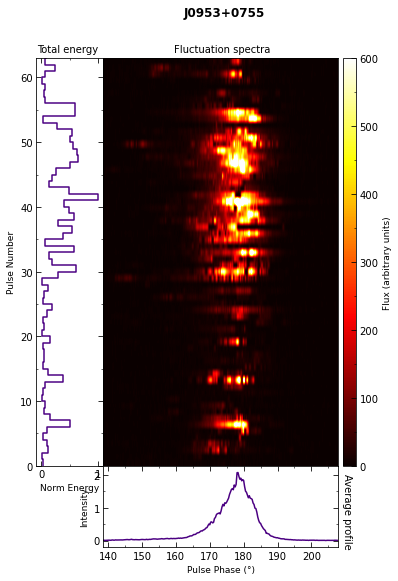

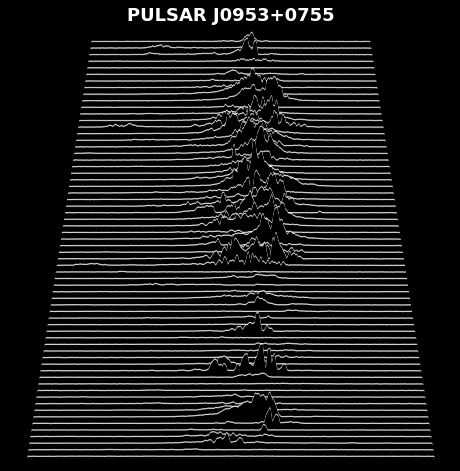

In [18]:
# 脉冲能量分布和脉冲瀑布图，HDF5格式。
import h5py
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.gridspec import GridSpec 
from matplotlib.ticker import AutoMinorLocator 
 
# Load data 
filename = "J0953+0755_602MHz_07Mar14_SP_I.hdf5" 
with h5py.File(filename, 'r') as f:
    data = np.array(f.get('default')) 
 
def safe_stddev(data, row_idx):
    """安全计算标准差，处理行数据不足的情况"""
    # 边界检查
    if row_idx >= data.shape[0]  or row_idx < 0:
        return np.zeros(1000) 
    
    # 获取行数据
    data_row = data[row_idx]
    
    # 处理数据长度不足的情况
    if len(data_row) < 1000:
        padded_data = np.zeros(1000) 
        min_len = min(len(data_row), 1000)
        padded_data[:min_len] = data_row[:min_len]
        data_row = padded_data 
    
    left_border = 0
    right_border = 100
    std_list = []
    
    # 滑动窗口计算标准差
    while right_border <= 1000:
        window_data = data_row[left_border:right_border]
        std_list.append(np.std(window_data)) 
        left_border += 50 
        right_border += 50 
    
    # 找到最小标准差的位置 
    min_std_idx = np.argmin(std_list) 
    left_border = 50 * min_std_idx 
    right_border = left_border + 100 
    
    # 计算平均值并中心化
    avg = np.mean(data_row[left_border:right_border]) 
    return data_row - avg
 
def format_axes(fig):
    """格式化坐标轴样式"""
    for ax in fig.axes: 
        ax.xaxis.set_minor_locator(AutoMinorLocator(2)) 
        ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
        ax.tick_params(which='major',  direction='in', length=5, top=True, right=True)
        ax.tick_params(which='minor',  direction='in', length=2, top=True, right=True)
 
def pulse_width_peak(profile_data, x):
    """计算脉冲宽度(W)和宽度分离时间(WST)"""
    ms_per_sample = 0.256
    max_val = np.max(profile_data) 
    max_idx = np.argmax(profile_data) 
    
    # 查找左侧边界 
    left_idx = max_idx
    while left_idx > 0 and profile_data[left_idx] > x * max_val:
        left_idx -= 1
    
    # 查找右侧边界 
    right_idx = max_idx
    while right_idx < len(profile_data) - 1 and profile_data[right_idx] > x * max_val:
        right_idx += 1
    
    # 计算宽度
    width_ms = (right_idx - left_idx) * ms_per_sample
    width_deg = (width_ms / 1000 * 360) / 0.71
    
    return round(width_ms, 2), round(width_deg, 2)
 
# 处理数据
start_row = 1245
end_row = 1309 
num_rows = end_row - start_row
new_data = []
total_energy = []
 
# 安全处理每一行数据 
current_row = start_row 
while current_row < end_row:
    try:
        # 计算标准化后的行数据
        row_data = safe_stddev(data, current_row)
        
        # 收集总能量 
        row_total_energy = np.sum(row_data) 
        total_energy.append(row_total_energy) 
        
        # 提取500-750区间的250个点 
        segment_start = 500
        segment_end = 750 
        segment = row_data[segment_start:segment_end]
        
        # 确保有250个点
        if len(segment) < 250:
            padding = np.zeros(250  - len(segment))
            segment = np.concatenate((segment,  padding))
        
        new_data.append(segment) 
        
    except Exception as e:
        print(f"行 {current_row} 处理错误: {str(e)}")
        # 出错时填充零值 
        total_energy.append(0) 
        new_data.append(np.zeros(250)) 
    
    current_row += 1
 
# 转换为NumPy数组 
new_data = np.array(new_data) 
new_data2 = np.mean(new_data,  axis=0)
 
# 归一化总能量 
max_energy = max(total_energy) if max(total_energy) > 0 else 1 
total_energy2 = [e / max_energy for e in total_energy]
 
# 绘图 
fig = plt.figure(figsize=(6,  9))
gs0 = GridSpec(6, 10, figure=fig, wspace=0, hspace=0)
gs1 = GridSpec(6, 22, figure=fig, hspace=0)
 
# 波动光谱图 
ax1 = fig.add_subplot(gs0[:5,  2:9])
img = ax1.imshow(new_data,  cmap='hot', aspect='auto', origin='lower', vmin=0, vmax=600)
ax1.set_xticks([]) 
ax1.set_yticks([]) 
ax1.text(75,  num_rows + 0.5, "Fluctuation spectra", fontsize=10)
 
# 总能量图 
ax2 = fig.add_subplot(gs0[:5,  :2])
ax2.plot(total_energy2,  np.arange(len(total_energy2)),  'indigo', drawstyle='steps-pre')
ax2.margins(0.1,  0)
ax2.set_ylabel("Pulse Number", fontsize=9)
ax2.set_xlabel("Norm Energy", fontsize=9)
ax2.text(-0.07,  len(total_energy2), "Total energy", fontsize=10)
 
# 平均轮廓图
ax3 = fig.add_subplot(gs0[5,  2:9])
ax3.plot([(499+i)/3.6  for i in range(250)], new_data2/100, 'indigo')
ax3.margins(0,  0.1)
ax3.set_xlabel("Pulse Phase (°)", fontsize=9)
ax3.set_ylabel("Intensity",  fontsize=9)
ax3.text(755/3.6,  max(new_data2)/100, "Average profile", rotation=-90, 
         rotation_mode="anchor", fontsize=10)
 
# 颜色条 
ax4 = fig.add_subplot(gs1[:5,  20])
plt.colorbar(img,  cax=ax4)
ax4.set_ylabel("Flux (arbitrary units)", fontsize=9)
 
# 添加标题和格式化
fig.suptitle("J0953+0755",  x=0.56, y=0.96, size="large", weight=600)
format_axes(fig)
 
# 计算脉冲宽度 
print(f"W50 = {pulse_width_peak(new_data2, 0.5)[0]} ms")
print(f"W50 = {pulse_width_peak(new_data2, 0.5)[1]}°")
print(f"W10 = {pulse_width_peak(new_data2, 0.1)[0]} ms")
print(f"W10 = {pulse_width_peak(new_data2, 0.1)[1]}°")
 
# 显示第一张图 
plt.tight_layout() 
plt.show() 
 
# 创建黑色背景的新图
fig = plt.figure(figsize=(8,  8), facecolor='black')
ax = plt.subplot(frameon=False) 
 
# 绘制瀑布图 
X = np.linspace(-1,  1, new_data.shape[1]) 
G = 0.005
for i in range(len(new_data)-1, -1, -1):
    xscale = 1 - i / 200
    lw = 1.5 - i / 100
    x = xscale * X
    y = i + G * new_data[i]
    ax.fill_between(x,  y, y+0.2, color="white", lw=lw, alpha=0.7)
    ax.fill_between(x,  y, color="black", lw=lw)
 
# 设置限制 
ax.set_ylim(-1,  len(new_data) + 1)
 
# 移除刻度
ax.set_xticks([]) 
ax.set_yticks([]) 
 
# 添加标题 
ax.text(0.5,  1.01, "PULSAR J0953+0755", transform=ax.transAxes, 
        ha="center", va="bottom", color="white",
        family="sans-serif", fontweight="bold", fontsize=18)

plt.show() 

In [20]:
# 从ATNF上筛选出IBMPs类型脉冲星数量
import psrqpy
import numpy as np
import pandas as pd

# ===============================
# 1. Query ATNF catalogue
# ===============================
query = psrqpy.QueryATNF(
    params=[
        'PSRJ',   # Pulsar name
        'P0',     # Spin period (s)
        'P1',     # Period derivative (s/s)
        'PB',     # Orbital period (days)
        'ECC'     # Eccentricity
    ]
)

df = query.table.to_pandas()

# ===============================
# 2. Basic cleaning
# ===============================
df = df.dropna(subset=['P0', 'PB', 'ECC'])

P = df['P0']   # s

# ===============================
# 3. IMBP definition (Camilo+ 1996, 2001)
# ===============================
mask_imbp = (
    (P > 0.01) & (P < 0.2) &
    (df['PB'] > 0.5) & (df['PB'] < 100) &
    (df['ECC'] < 0.002)
)

imbp = df[mask_imbp].copy()

print(f"Number of IMBP candidates (Camilo+ 1996, 2001): {len(imbp)}")

# ===============================
# 4. Derived quantities (NOT selection criteria)
# ===============================
# Characteristic age (yr)
imbp['tau_c'] = (
    imbp['P0'] /
    (2.0 * imbp['P1']) /
    (3600 * 24 * 365.25)
)

# ===============================
# 5. Formatting for display
# ===============================
disp = imbp[['PSRJ', 'P0', 'P1', 'tau_c', 'PB', 'ECC']].copy()

disp['P0'] = disp['P0'].map(lambda x: f"{x:.15f}")
disp['P1'] = disp['P1'].map(lambda x: f"{x:.3e}")
disp['tau_c'] = (disp['tau_c'] / 1e8).map(lambda x: f"{x:.2f}")
disp['PB'] = disp['PB'].map(lambda x: f"{x:.6f}")
disp['ECC'] = disp['ECC'].map(lambda x: f"{x:.6f}")

disp = disp.rename(columns={
    'P0': 'P (s)',
    'P1': 'Pdot (s s⁻¹)',
    'tau_c': 'tau_c (10⁸ yr)',
    'PB': 'PB (days)',
    'ECC': 'ECC'})

pd.set_option('display.width', 200)
print(disp)
disp.to_excel("IMBPs_list.xlsx", index=False)

Number of IMBP candidates (Camilo+ 1996, 2001): 46
              PSRJ              P (s) Pdot (s s⁻¹) tau_c (10⁸ yr)  PB (days)       ECC
398     J0700+6418  0.195670945166274    6.853e-19          45.24   1.028670  0.000008
400     J0709+0458  0.034428978177459    3.804e-19          14.34   4.366681  0.000225
406     J0721-2038  0.015542394974000    4.400e-20          55.97   5.460833  0.000102
500     J0900-3144  0.011109649338094    4.888e-20          36.01  18.737636  0.000010
606     J1022+1001  0.016452929958449    4.334e-20          60.15   7.805134  0.000097
634     J1045-0436  0.024047517034172    7.865e-20          48.45  10.273646  0.000075
659     J1056-7117  0.026309676982434    6.299e-20          66.18   9.138799  0.000013
765     J1157-5112  0.043589227062840    1.430e-19          48.30   3.507386  0.000402
800     J1227-6208  0.034527834688743    1.864e-19          29.35   6.721013  0.001149
810     J1232-6501  0.088281908234143    8.105e-19          17.26   1.863272  0

In [23]:
# 画P-Pdot图，从尹德江处copy，详细见：https://github.com/ydejiang/pulsar-kit/blob/main/python/ATNF_PSRcat_download.ipynb
import psrqpy
from psrqpy import QueryATNF
import psrqpy.utils
import shutil
import os

In [24]:
# 获取缓存目录
cache_dir = psrqpy.utils.CACHEDIR
print(f"psrqpy cache directory: {cache_dir}")

# 如果缓存目录存在则删除(强制)
if os.path.exists(cache_dir):
    print("Deleting psrqpy cache...")
    shutil.rmtree(cache_dir)
    print("Cache cleared.")
else:
    print("Cache directory does not exist. Nothing to delete.")

# 现在开始重新查询，将自动生成最新缓存
print("Querying ATNF to regenerate cache...")
query = QueryATNF()  # 默认从网络下载最新 ATNF 数据
ATNF_psr = query.pandas
numstring = 'Version {} of the ATNF catalogue contains {} pulsars'

print(numstring.format(query.get_version, query.num_pulsars))
print("ATNF query finished. Latest data loaded.")
print(ATNF_psr.head())

psrqpy cache directory: /home/chenyujie/.cache/psrqpy
Deleting psrqpy cache...
Cache cleared.
Querying ATNF to regenerate cache...


Version 2.7.0 of the ATNF catalogue contains 4351 pulsars
ATNF query finished. Latest data loaded.
         PSRJ PSRJ_REF          RAJ  RAJ_ERR RAJ_REF         DECJ  DECJ_ERR DECJ_REF  POSEPOCH POSEPOCH_REF  ...  UPRMASS  MASSFN_ERR MINOMDOT         H0_SD  \
0  J0002+6216   cwp+17  00:02:58.17     0.02  cwp+17  +62:16:09.4       0.1   cwp+17   55806.0       cwp+17  ...      NaN         NaN      NaN  2.884717e-26   
1  J0006+1834    cnt96   00:06:04.8     0.20    cn95    +18:34:59       4.0     cn95   49079.5         cn95  ...      NaN         NaN      NaN  5.155743e-26   
2  J0007+7303  aaa+09c   00:07:01.7     0.20  awd+12  +73:03:07.4       0.8   awd+12   54952.0       awd+12  ...      NaN         NaN      NaN  6.153093e-25   
3    J0011+08   dsm+16     00:11:34    31.00  dsm+16       +08:10       8.0   dsm+16   57022.0       dsm+16  ...      NaN         NaN      NaN           NaN   
4  J0012+5431   dcm+23   00:12:23.3     0.10  dcm+23    +54:31:40       9.0   dcm+23   59128.0       

In [25]:
# 检查实际的版本的数量是否最新 ？
from psrqpy.utils import get_catalogue
# 先更新缓存
get_catalogue(update=True)
print(len(get_catalogue(update=True)))

4351


In [26]:
from psrqpy import QueryATNF
import numpy as np
q = QueryATNF()
# 获取 TYPE 列并去除空值
types = q.table['TYPE']
#types = types[types != None]   # astropy Table 不支持 dropna
# 查看所有 unique 类型（未拆分）
print(types)

TYPE
----
  HE
  --
NRAD
  --
RRAT
  --
  --
  HE
  --
  --
 ...
  --
  --
  --
  --
  --
  --
  --
  --
RRAT
  --
Length = 4351 rows


In [ ]:
help(query.ppdot)

In [27]:
import inspect
print(inspect.signature(query.ppdot))

(intrinsicpdot=False, excludeGCs=False, showtypes=[], showGCs=False, showSNRs=False, markertypes={}, deathline=True, deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True, brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None, periodlims=None, usecondition=True, usepsrs=True, rcparams={})


In [28]:
import inspect
import psrqpy

print(inspect.getsource(psrqpy.QueryATNF.ppdot))

    def ppdot(self, intrinsicpdot=False, excludeGCs=False, showtypes=[],
              showGCs=False, showSNRs=False, markertypes={}, deathline=True,
              deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True,
              brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None,
              periodlims=None, usecondition=True, usepsrs=True, rcparams={}):
        """
        Draw a lovely period vs period derivative diagram.

        Args:
            intrinsicpdot (bool): use the intrinsic period derivative corrected
                for the `Shklovskii effect <https://en.wikibooks.org/wiki/Pulsars_and_neutron_stars/Pulsar_properties#Pulse_period>`_
                rather than the observed value. Defaults to False.
            excludeGCs (bool): exclude globular cluster pulsars as their period
                derivatives can be contaminated by intra-cluster accelerations.
                Defaults to False.
            showtypes (list, str): a list of pulsar t

In [29]:
import inspect
import psrqpy

print(inspect.getsource(psrqpy.QueryATNF.ppdot))

    def ppdot(self, intrinsicpdot=False, excludeGCs=False, showtypes=[],
              showGCs=False, showSNRs=False, markertypes={}, deathline=True,
              deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True,
              brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None,
              periodlims=None, usecondition=True, usepsrs=True, rcparams={}):
        """
        Draw a lovely period vs period derivative diagram.

        Args:
            intrinsicpdot (bool): use the intrinsic period derivative corrected
                for the `Shklovskii effect <https://en.wikibooks.org/wiki/Pulsars_and_neutron_stars/Pulsar_properties#Pulse_period>`_
                rather than the observed value. Defaults to False.
            excludeGCs (bool): exclude globular cluster pulsars as their period
                derivatives can be contaminated by intra-cluster accelerations.
                Defaults to False.
            showtypes (list, str): a list of pulsar t

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


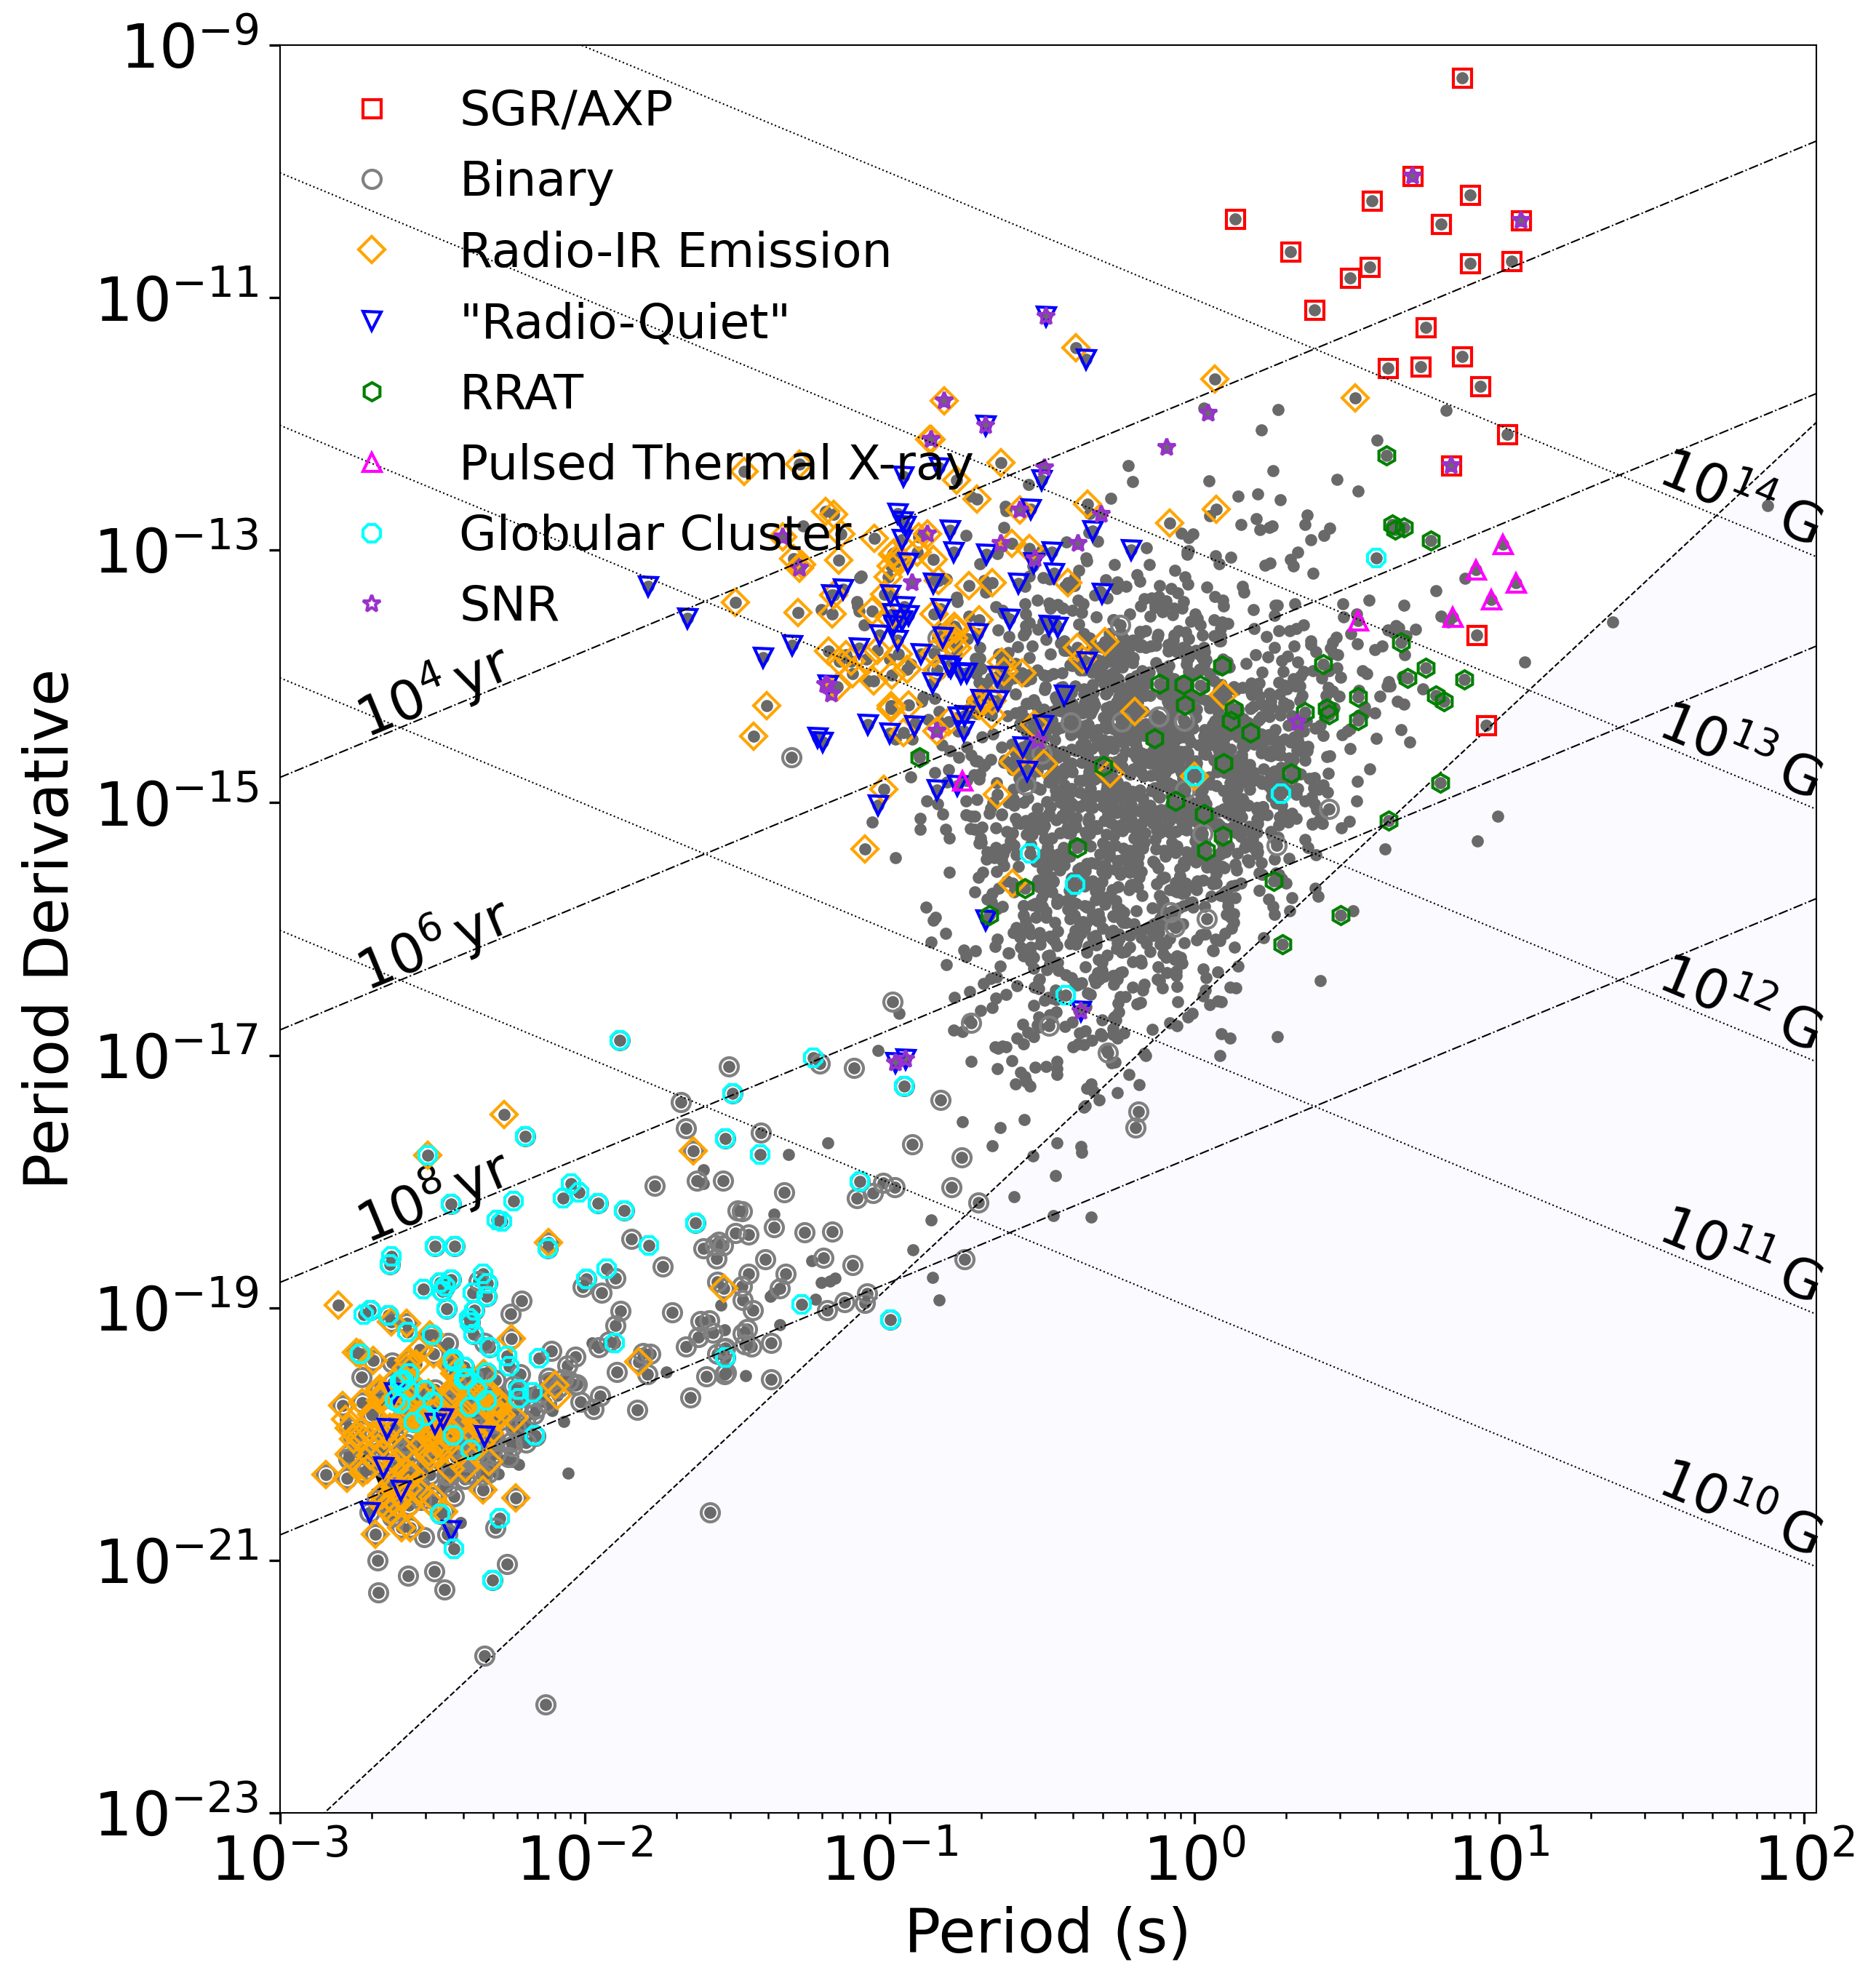

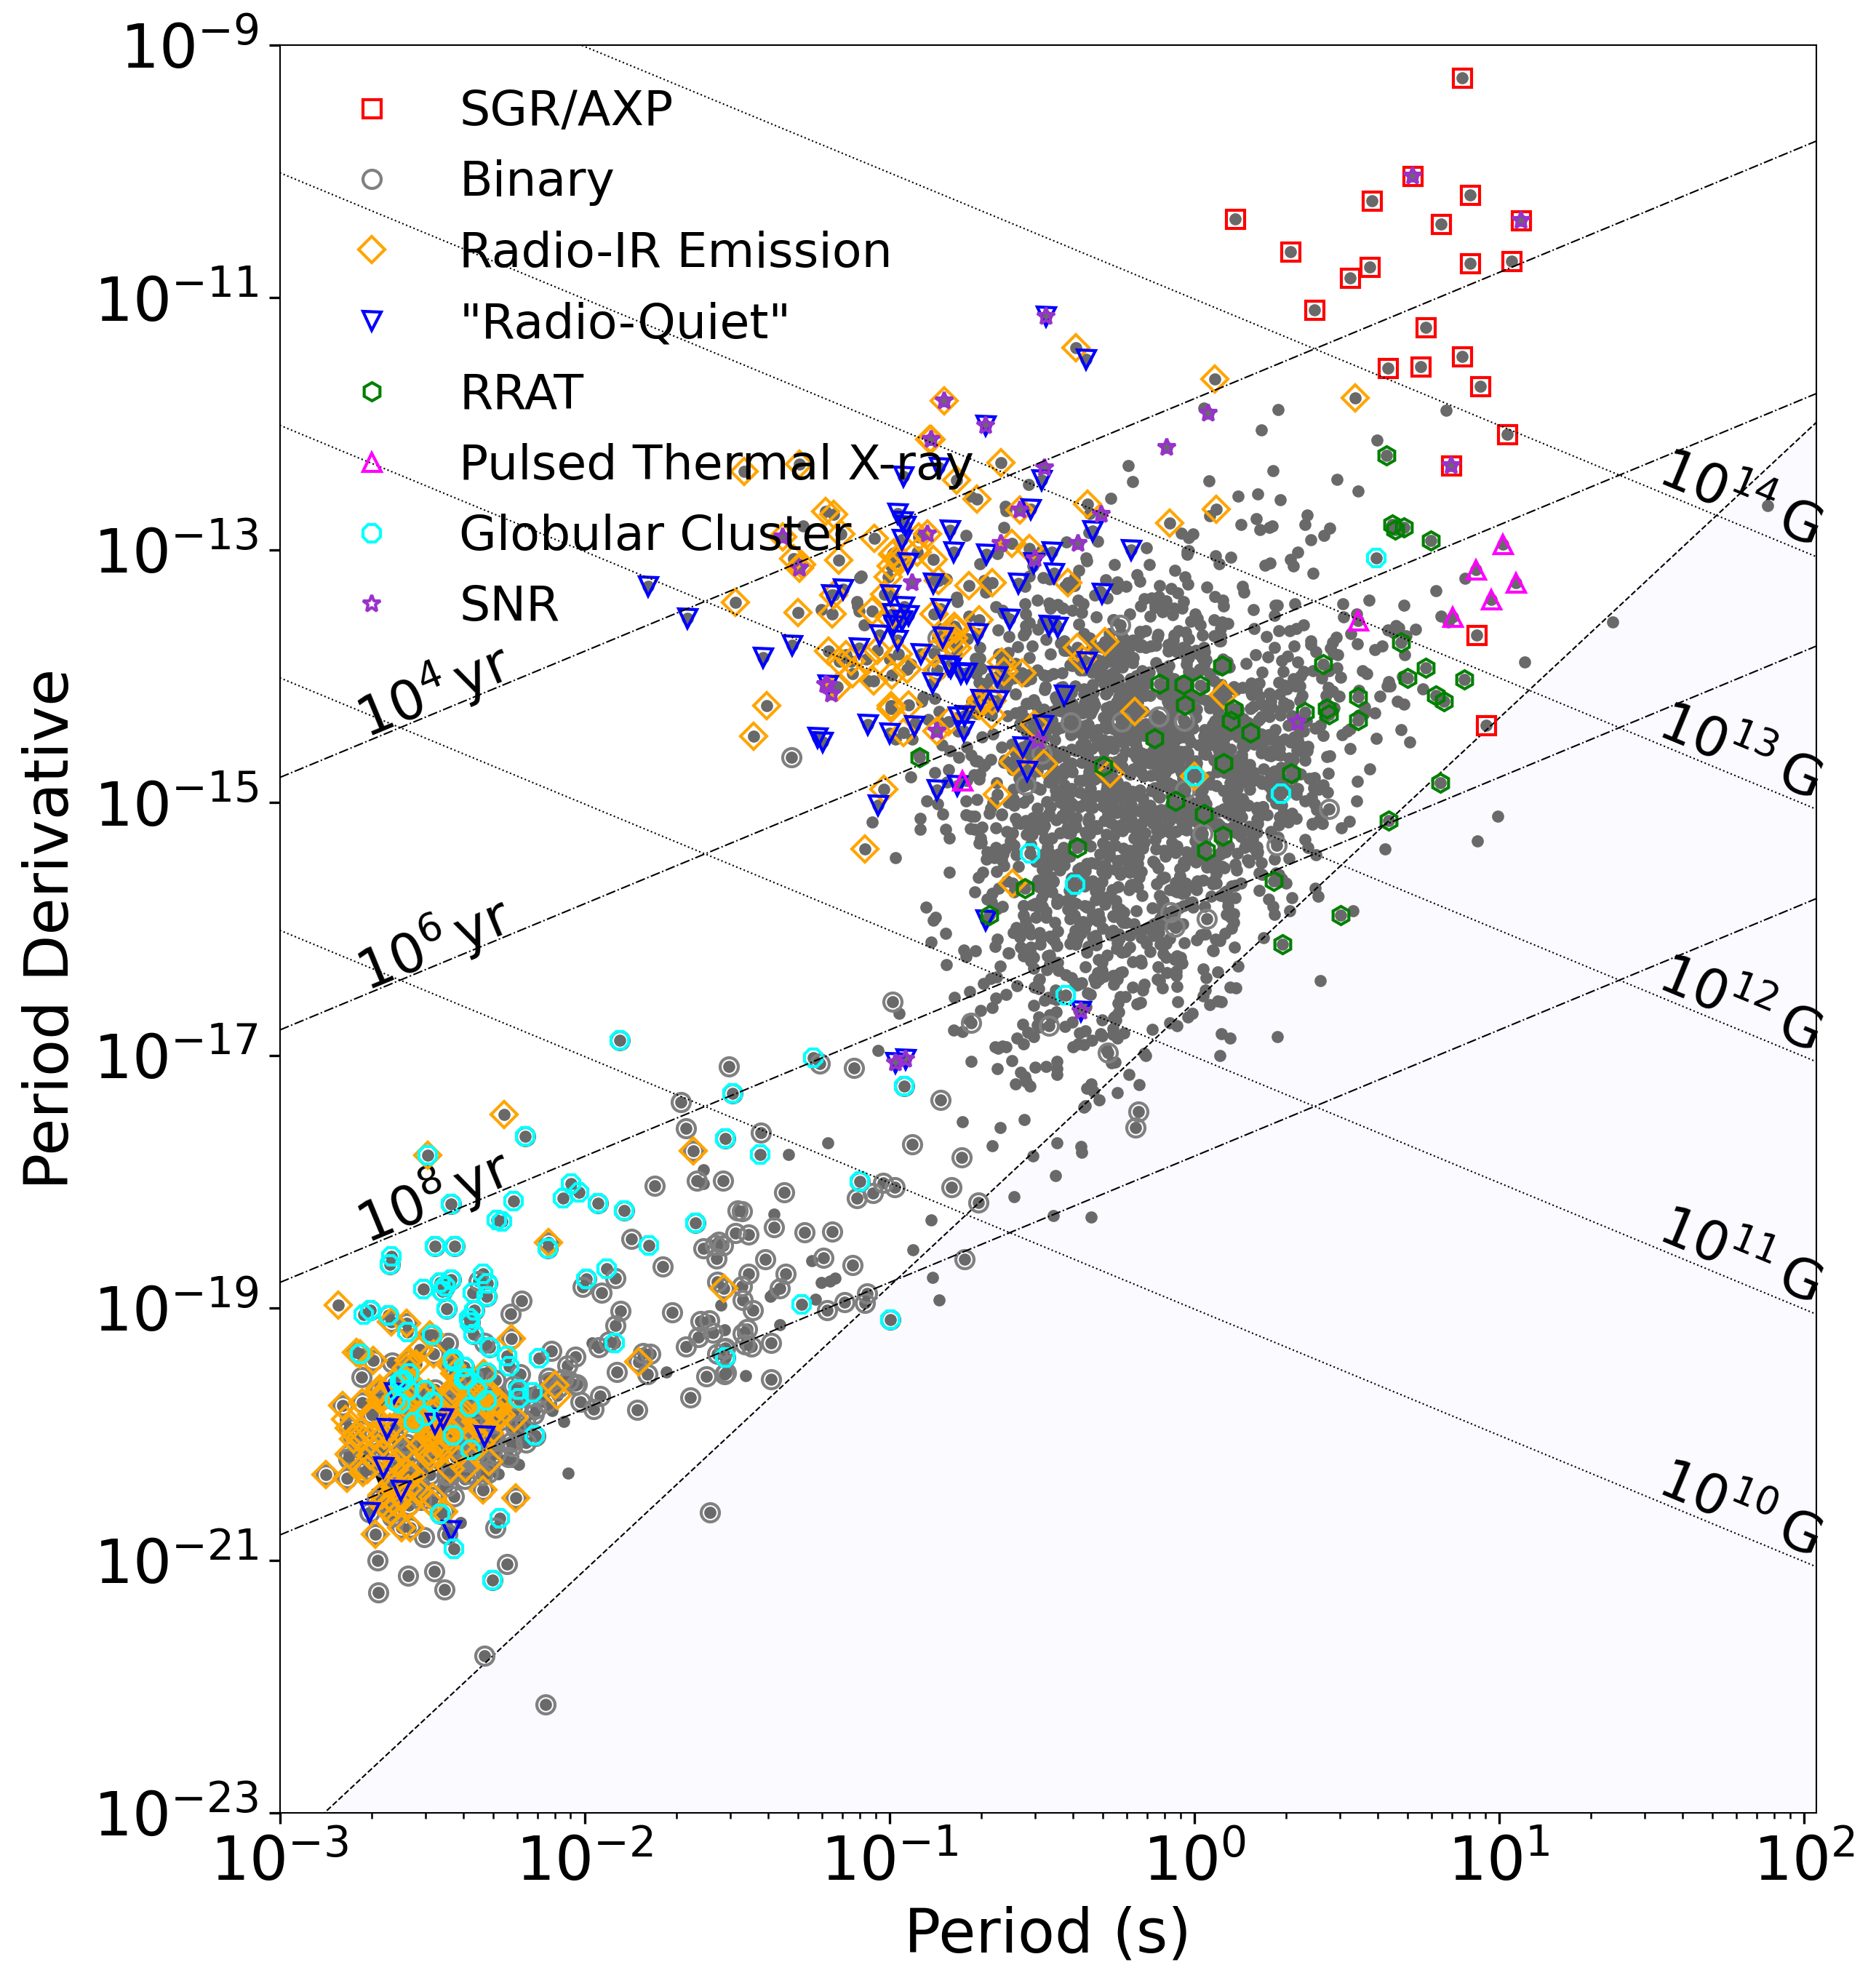

In [30]:
query.ppdot(showSNRs=True,showGCs=True, filldeathtype={'facecolor':'blue','alpha':0.02}, tau=[ 1e4, 1e6, 1e8 , 1e10],
          rcparams={'font.sans-serif':'Arial','figure.dpi': 300,}, periodlims=[0.001, 110],showtypes='all')

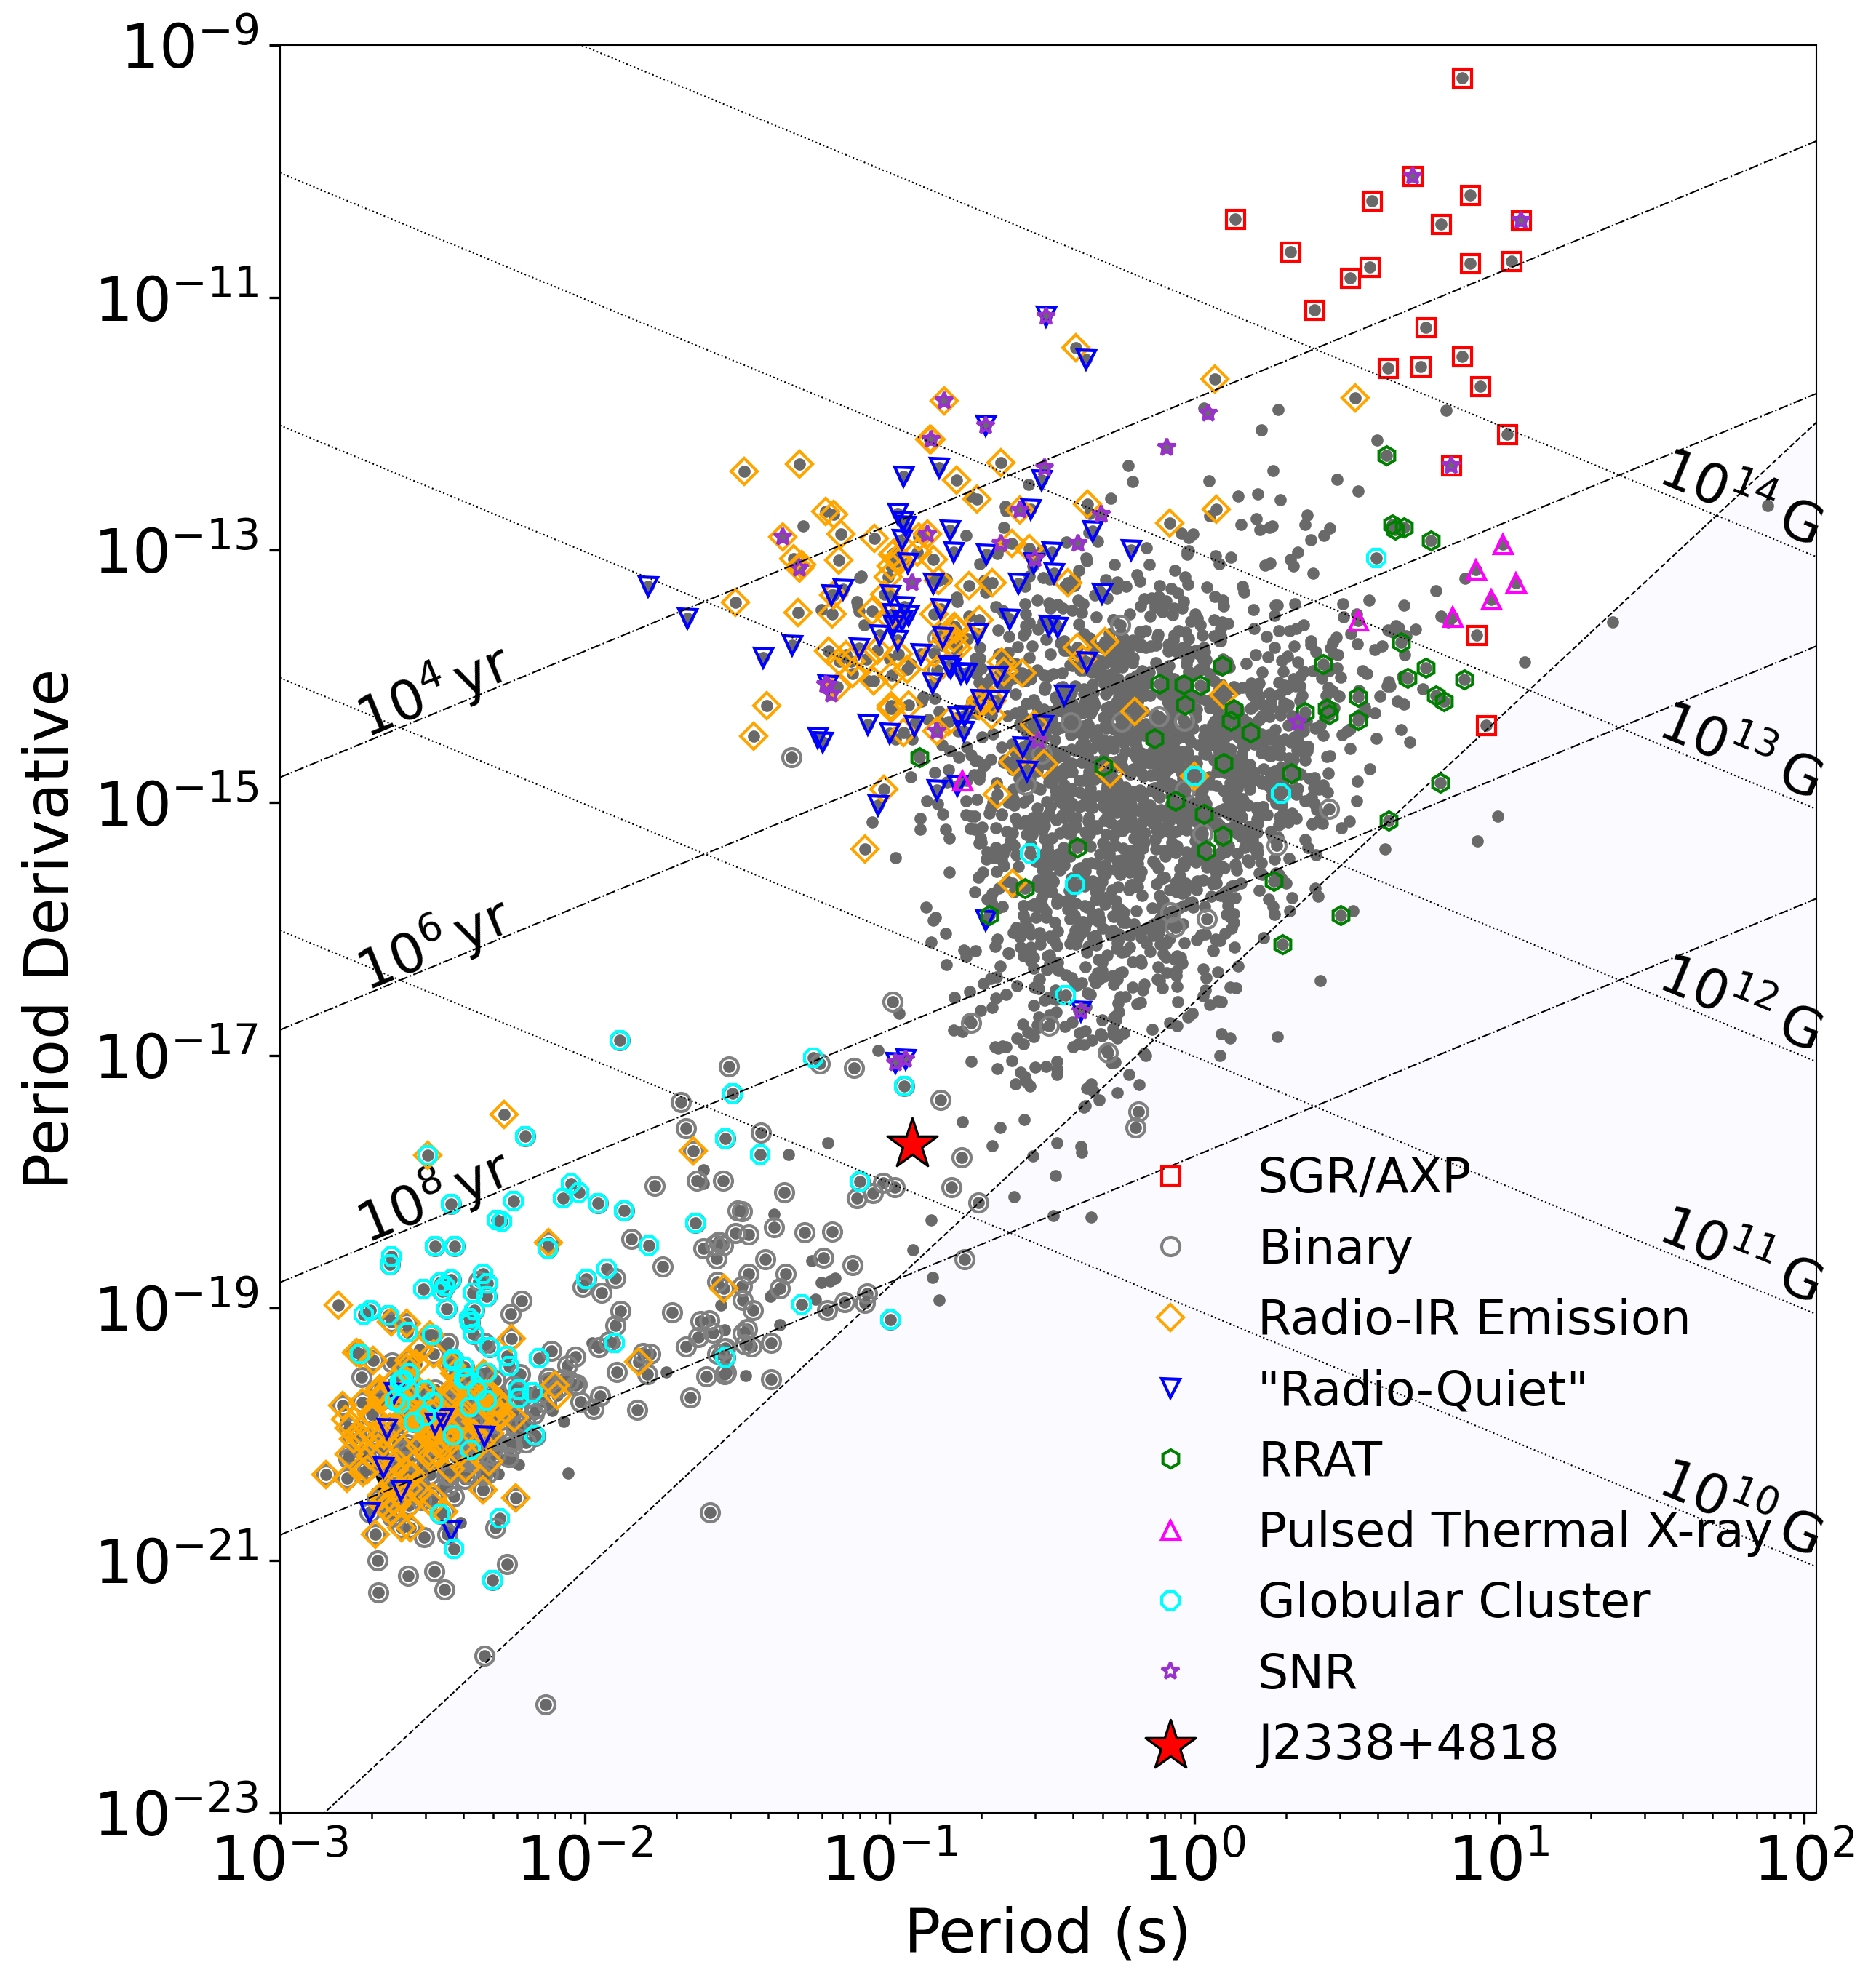

In [31]:
# 突出特定的一颗脉冲星，这里以PSR J2338+4818为例
fig = query.ppdot(showSNRs=True, showGCs=True, filldeathtype={'facecolor':'blue','alpha':0.02}, tau=[1e4, 1e6, 1e8, 1e10],
    rcparams={'font.sans-serif': 'Arial', 'figure.dpi': 300,}, periodlims=[0.001, 110], showtypes='all')

psrname = "J2338+4818"

# astropy Table
tab = query.table
mask = tab['PSRJ'] == psrname
psr = tab[mask]

if len(psr) == 0:
    raise ValueError(f"{psrname} not found in ATNF catalogue")

P = psr['P0'][0]   # s
Pdot = psr['P1'][0]

ax = fig.axes[0]
ax.scatter(0.118710250690210, 1.9729e-18, marker='*', s=300, color='red', edgecolor='black', linewidth=0.8, zorder=10, label=psrname)
ax.legend()

In [39]:
# PINT计时
import os
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pint.fitter
import pint.residuals
from pint.toa import get_TOAs
from pint.models import get_model
import pint.logging
import pint.config

# setup logging
pint.logging.setup(level="INFO")

# 加载星历文件和到达时间文件
parfile = pint.config.examplefile("J0613-sim.par")
timfile = pint.config.examplefile("J0613-sim.tim")
assert os.path.exists(parfile)
assert os.path.exists(timfile)

# 读取模型和到达时间
m = get_model(parfile)
t = get_TOAs(timfile, model=m)
print(t.get_summary())  #打印toas的概述

INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


Number of TOAs:  1462
Number of commands:  1
Number of observatories: 1 ['gbt']
MJD span:  53216.127 to 55639.377
Date span: 2004-07-30 03:02:25.259500804 to 2011-03-19 09:02:12.380605527
gbt TOAs (1462):
  Min freq:      1340.000 MHz
  Max freq:      1432.000 MHz
  Min error:     0.146 us
  Max error:     38.8 us
  Median error:  1.54 us



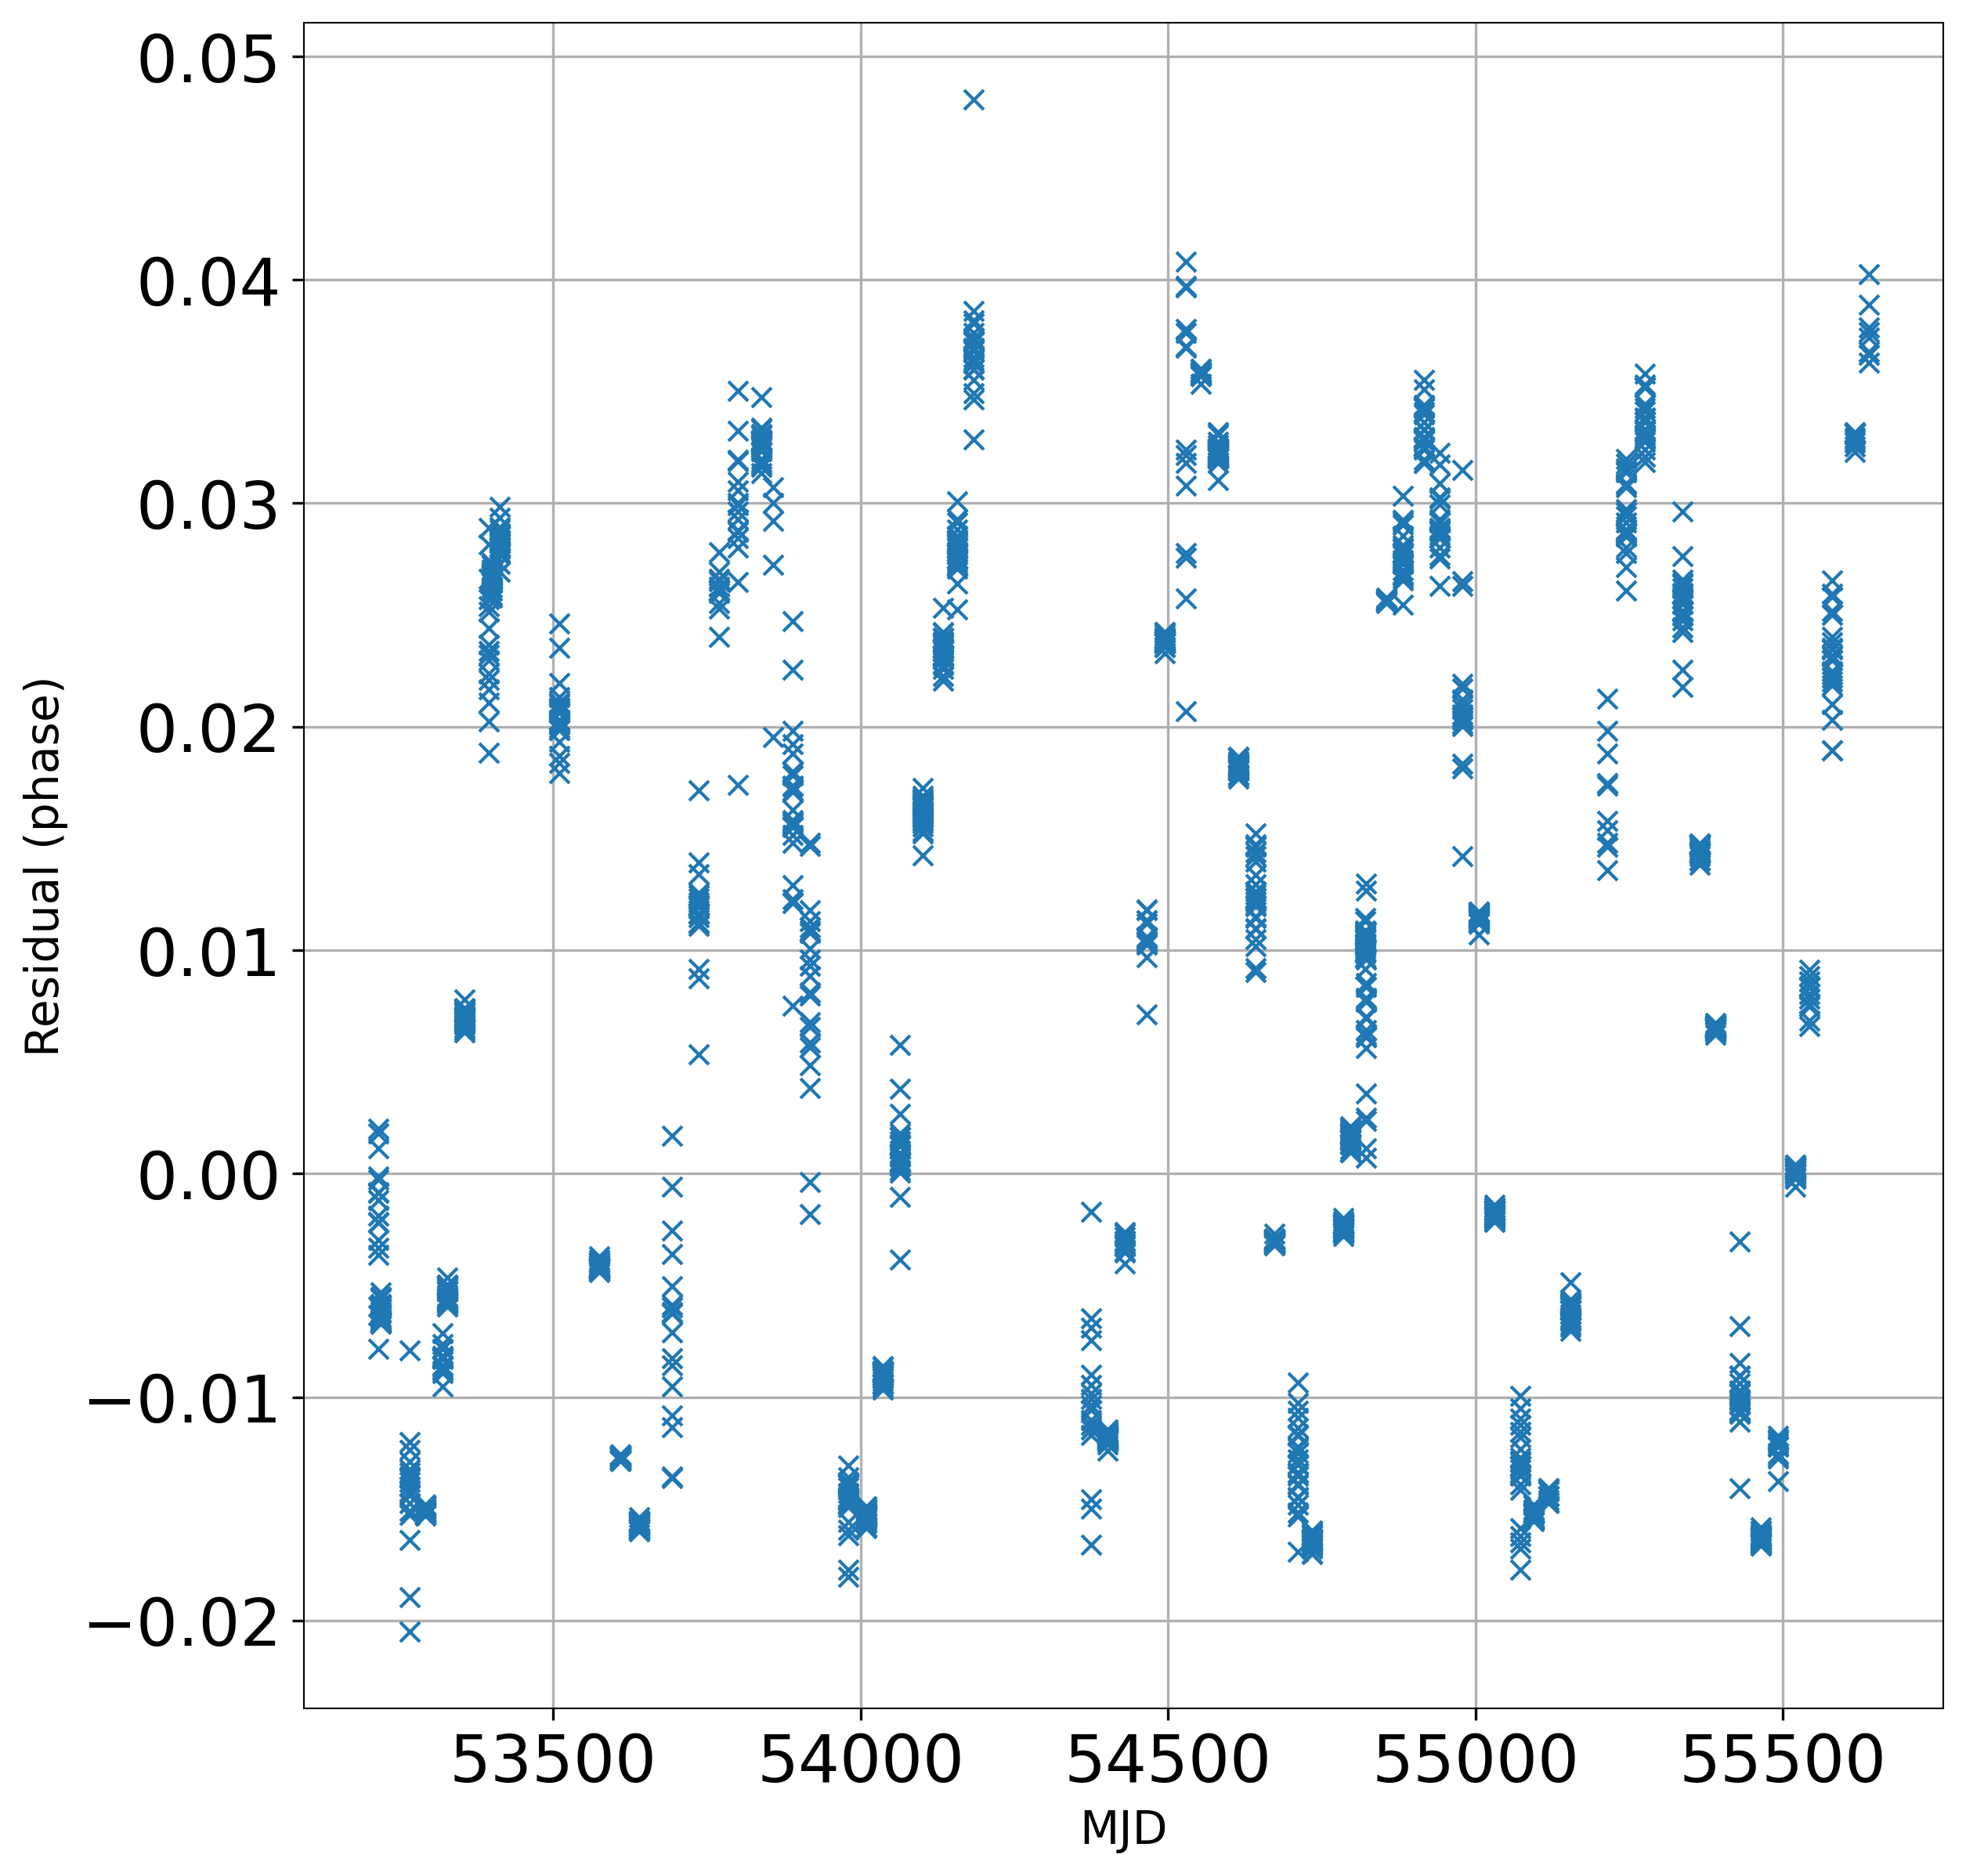

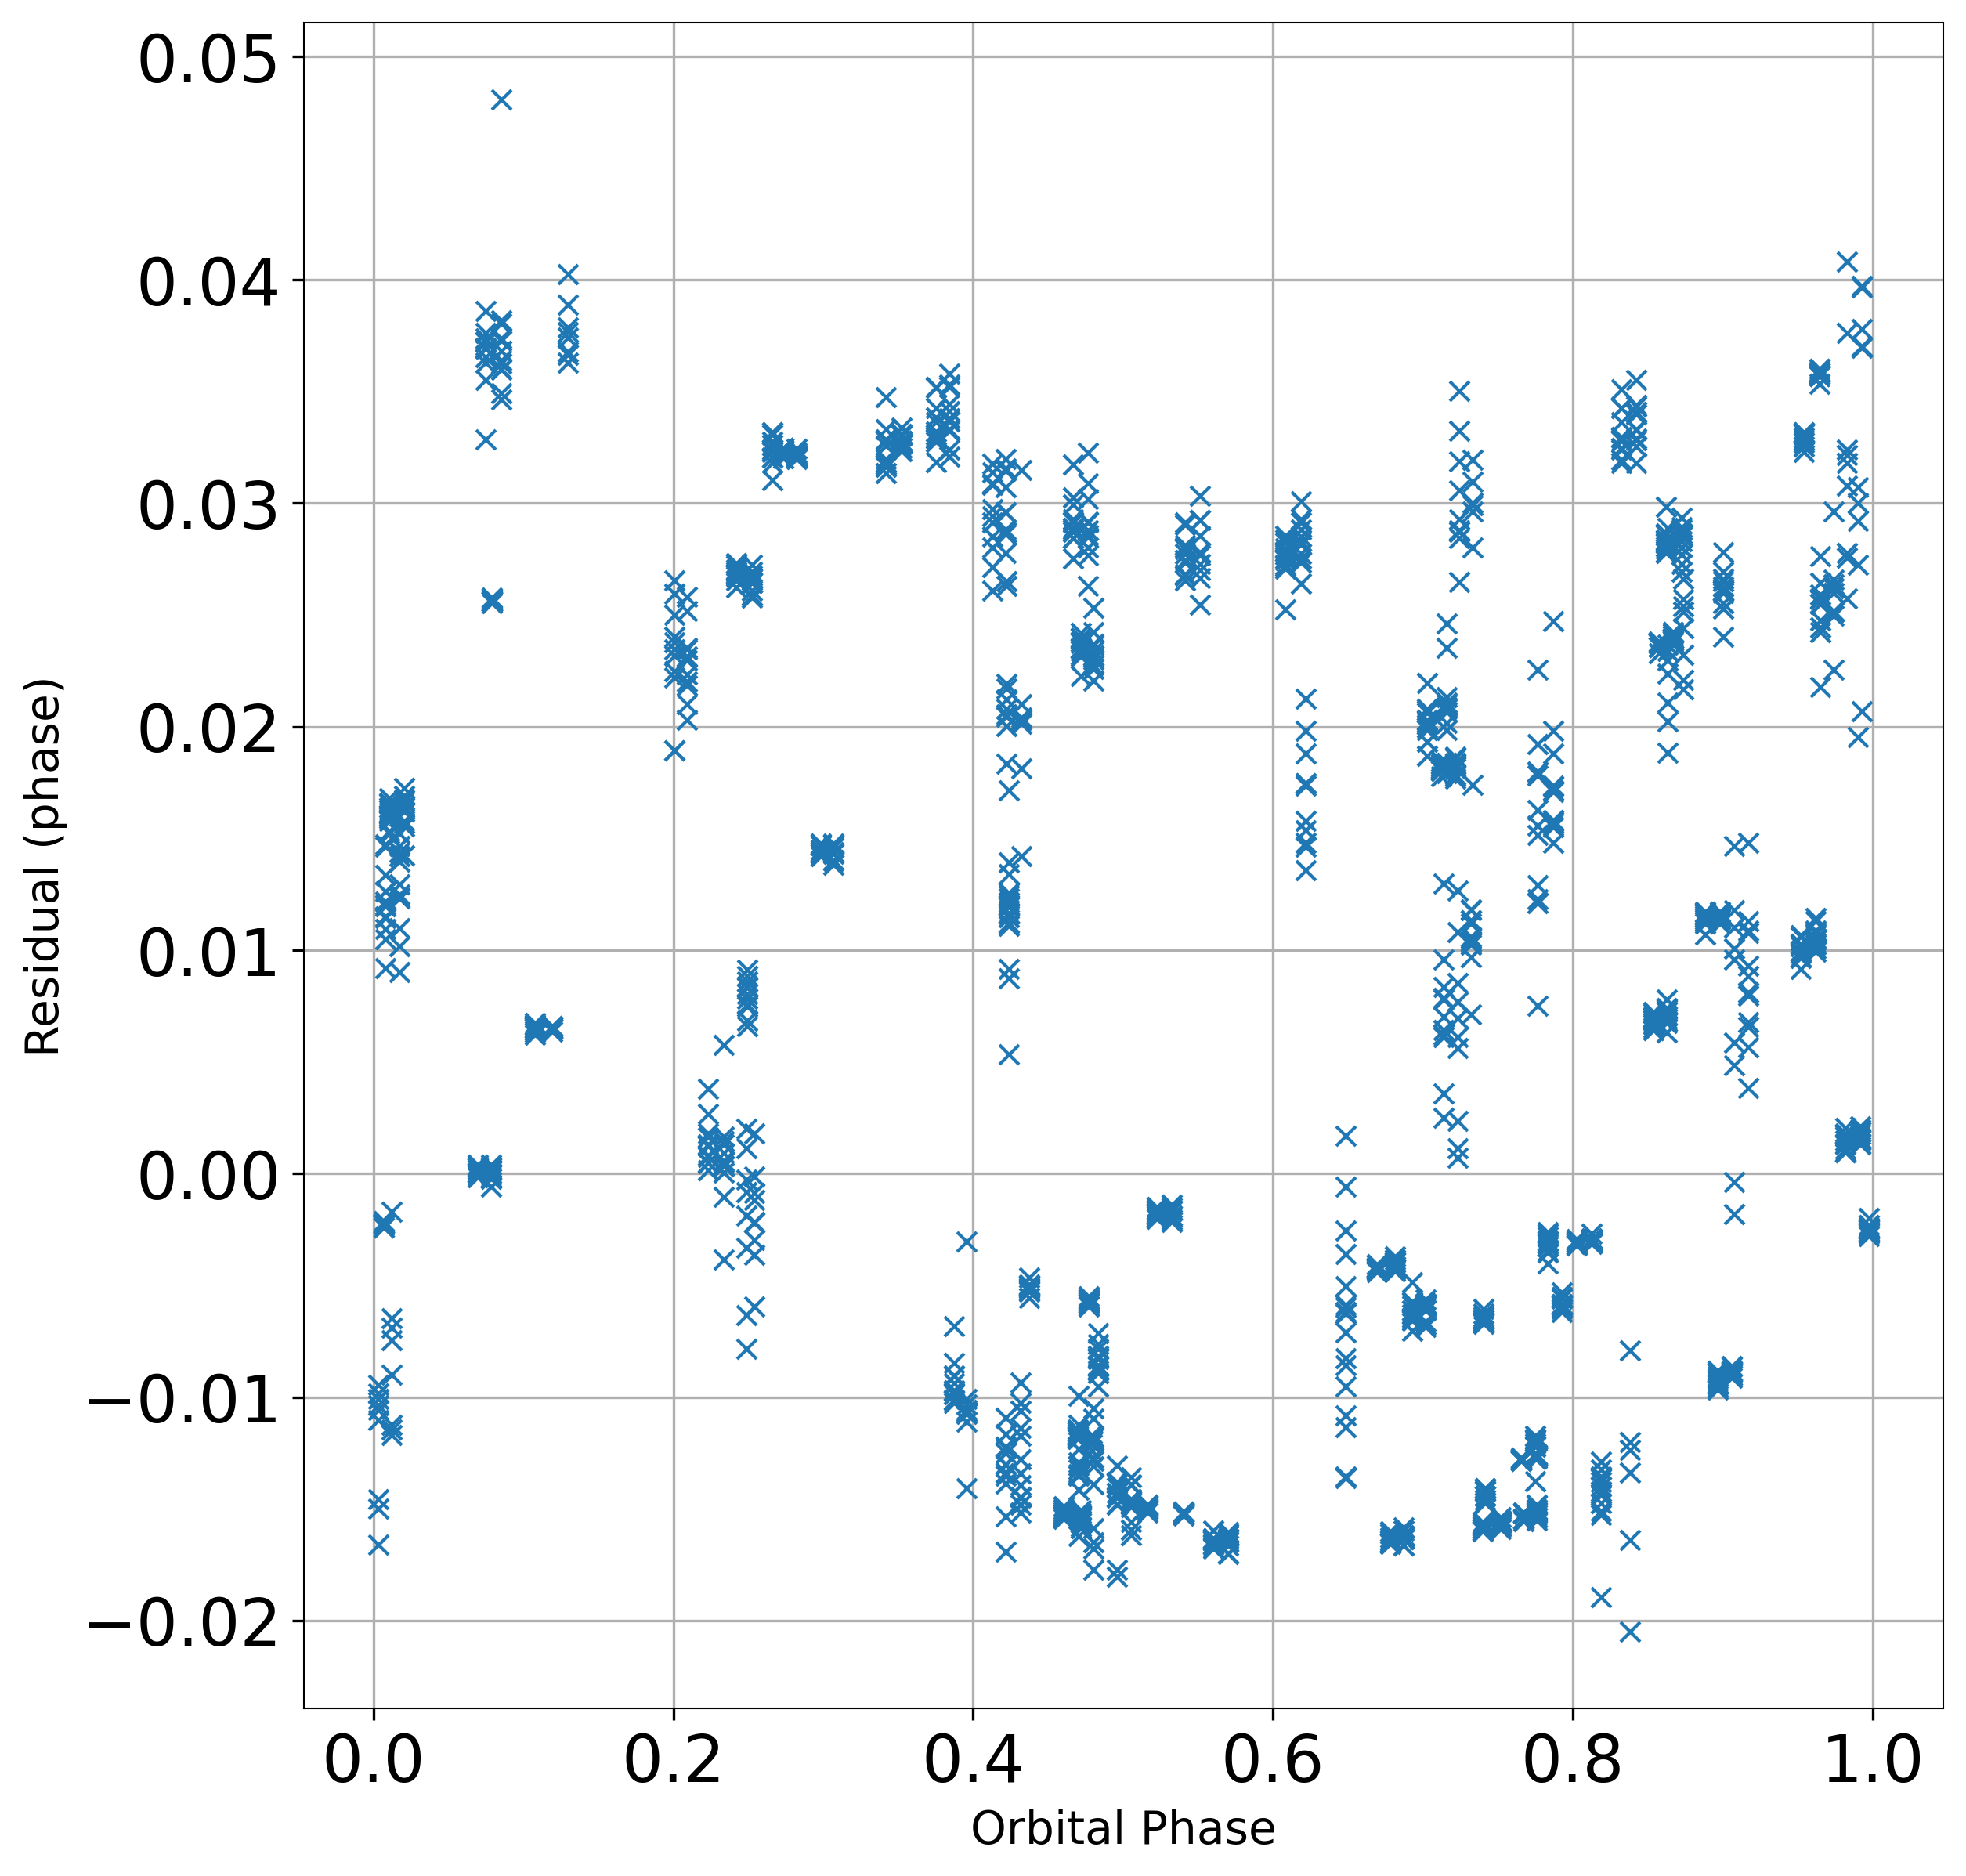

In [40]:
# 预拟合残差位置图
rs = pint.residuals.Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.plot(xt, rs, "x")
#plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD", fontsize=14)
plt.ylabel("Residual (phase)", fontsize=14)
plt.grid()
plt.show()

# 预拟合残差位置图
rs = pint.residuals.Residuals(t, m).phase_resids
xp = m.orbital_phase(t.get_mjds()) / (2 * np.pi)
#print(f"相位范围: [{np.min(xp):.3f},  {np.max(xp):.3f}]") 
plt.plot(xp, rs, "x")
#plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("Orbital Phase", fontsize=14)
plt.ylabel("Residual (phase)", fontsize=14)
plt.grid()
plt.show()

In [41]:
# 开始残差
print("Fitting.")
f = pint.fitter.DownhillWLSFitter(t, m)
f.fit_toas()
# f = pint.fitter.DownhillGLSFitter(t, m)
# f.fit_toas(full_cov=True)

# 打印拟合参数
print("Best fit has reduced chi^2 of", f.resids.reduced_chi2)
print("RMS in phase is", f.resids.phase_resids.std())
print("RMS in time is", f.resids.time_resids.std().to(u.us))

# 展示拟合参数相关矩阵
corm = f.get_parameter_correlation_matrix(pretty_print=True)

Fitting.
Best fit has reduced chi^2 of 1.0530416318318982894
RMS in phase is 0.0016903157582051568
RMS in time is 5.1754833104099625 us

Parameter correlation matrix:
         PX     RAJ   DECJ   PMRA   PMDEC   F0     F1     DM     PB     A1     ECC    T0     OM   
  PX     1.000
  RAJ    0.020  1.000
 DECJ    0.268  0.174  1.000
 PMRA    0.251  0.528  0.201  1.000
 PMDEC   0.074 -0.068  0.248  0.015  1.000
  F0    -0.020  0.422  0.279  0.336  0.110  1.000
  F1    -0.077  0.190  0.097 -0.180  0.155  0.754  1.000
  DM    -0.089  0.043 -0.003  0.007 -0.006  0.076  0.054  1.000
  PB     0.005 -0.103 -0.086  0.178  0.302 -0.191 -0.198 -0.043  1.000
  A1     0.176  0.478  0.296  0.065 -0.124  0.380  0.146 -0.031 -0.281  1.000
  ECC    0.174 -0.064  0.353  0.235  0.207  0.273  0.171 -0.045  0.328 -0.160  1.000
  T0     0.006 -0.063 -0.213 -0.142  0.331  0.253  0.397 -0.084 -0.180 -0.010  0.104  1.000
  OM     0.006 -0.063 -0.213 -0.142  0.331  0.253  0.397 -0.084 -0.180 -0.010  0.104  1.000 

In [42]:
# 打印参数拟合情况
print(f.get_summary())

Fitted model using downhill_wls method with 13 free parameters to 1462 TOAs
Prefit residuals Wrms = 50.50842422417613 us, Postfit residuals Wrms = 0.6161632331026217 us
Chisq = 1524.804 for 1448 d.o.f. for reduced Chisq of 1.053

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           J0613-0200 J0613-0200                   None
EPHEM                              DE421 DE421                        None
CLOCK                            TT(TAI) TT(TAI)                      None
UNITS                                TDB TDB                          None
START                            53448.8                      53216.1 d 
FINISH                           56586.4                      55639.4 d 
TIMEEPH                             FB90 FB90                         None
BINARY                                BT BT                           None
DILATEFREQ            

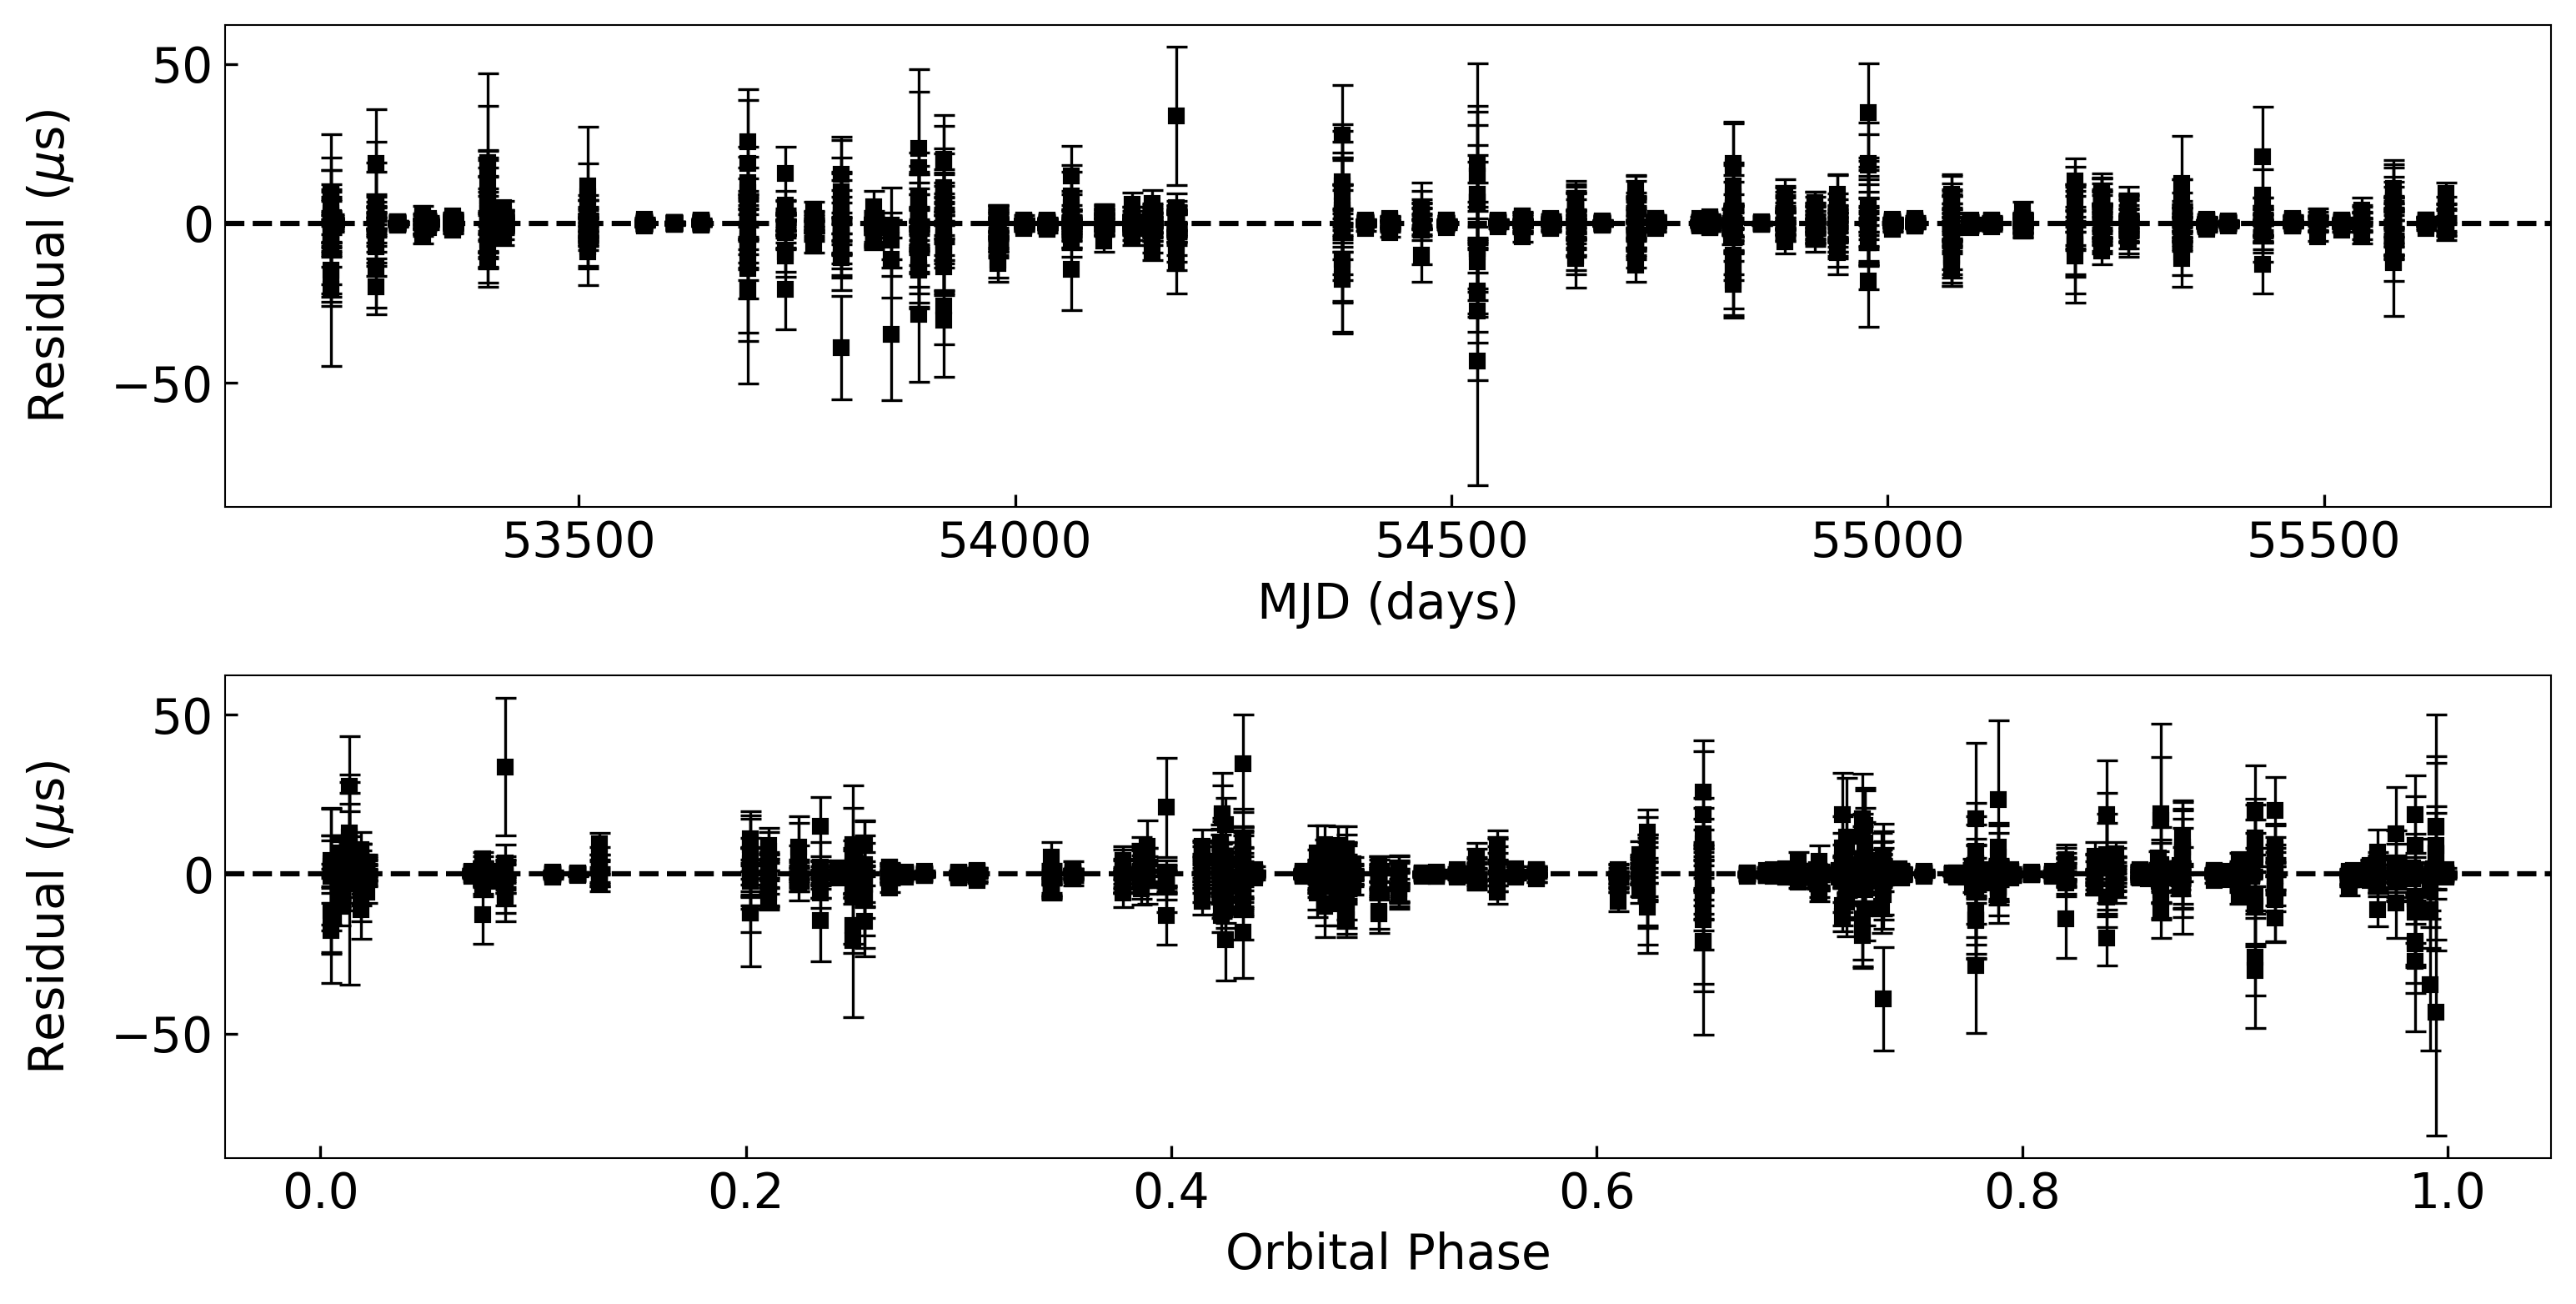

In [45]:
# 残差图
import matplotlib.gridspec  as gridspec
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]  = (12, 6)
plt.rcParams["figure.dpi"]  = 300

gs = gridspec.GridSpec(2, 1, 
                       height_ratios=[1, 1],  # 上下行高度相等 
                       hspace=0.35)           # 上下间距

mjd_ax1 = plt.subplot(gs[0])  # 上行残差图
phase_ax2 = plt.subplot(gs[1])  # 下行相位残差图

# ---------------- 拟合后残差位置图 ----------------
plt.sca(mjd_ax1)
plt.errorbar(
    xt.value,
    f.resids.time_resids.to_value(u.us),
    t.get_errors().to_value(u.us),
    fmt="s",
    capsize=3,
    elinewidth=0.8,
    capthick=0.8,
    markersize=4,
    color="k"
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("MJD (days)", fontsize=14)
plt.ylabel("Residual ($\mu$s)", fontsize=14, labelpad=10)
plt.grid(False)
plt.gca().axhline(0, color='k', linestyle='--')
mjd_ax1.tick_params(axis='both', which='both', direction='in')  # ← 坐标刻度内侧

# ---------------- 拟合后残差相位图 ----------------
plt.sca(phase_ax2)
plt.errorbar(
    f.model.orbital_phase(t.get_mjds()) / (2 * np.pi),
    f.resids.time_resids.to_value(u.us),
    t.get_errors().to_value(u.us),
    fmt="s",
    capsize=3,
    elinewidth=0.8,
    capthick=0.8,
    markersize=4,
    color="k"
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Orbital Phase", fontsize=14)
plt.ylabel("Residual ($\mu$s)", fontsize=14, labelpad=10)
plt.grid(False)
plt.gca().axhline(0, color='k', linestyle='--')
phase_ax2.tick_params(axis='both', which='both', direction='in') 
#plt.savefig("J2338+4818_residual_profile.png")
plt.show()

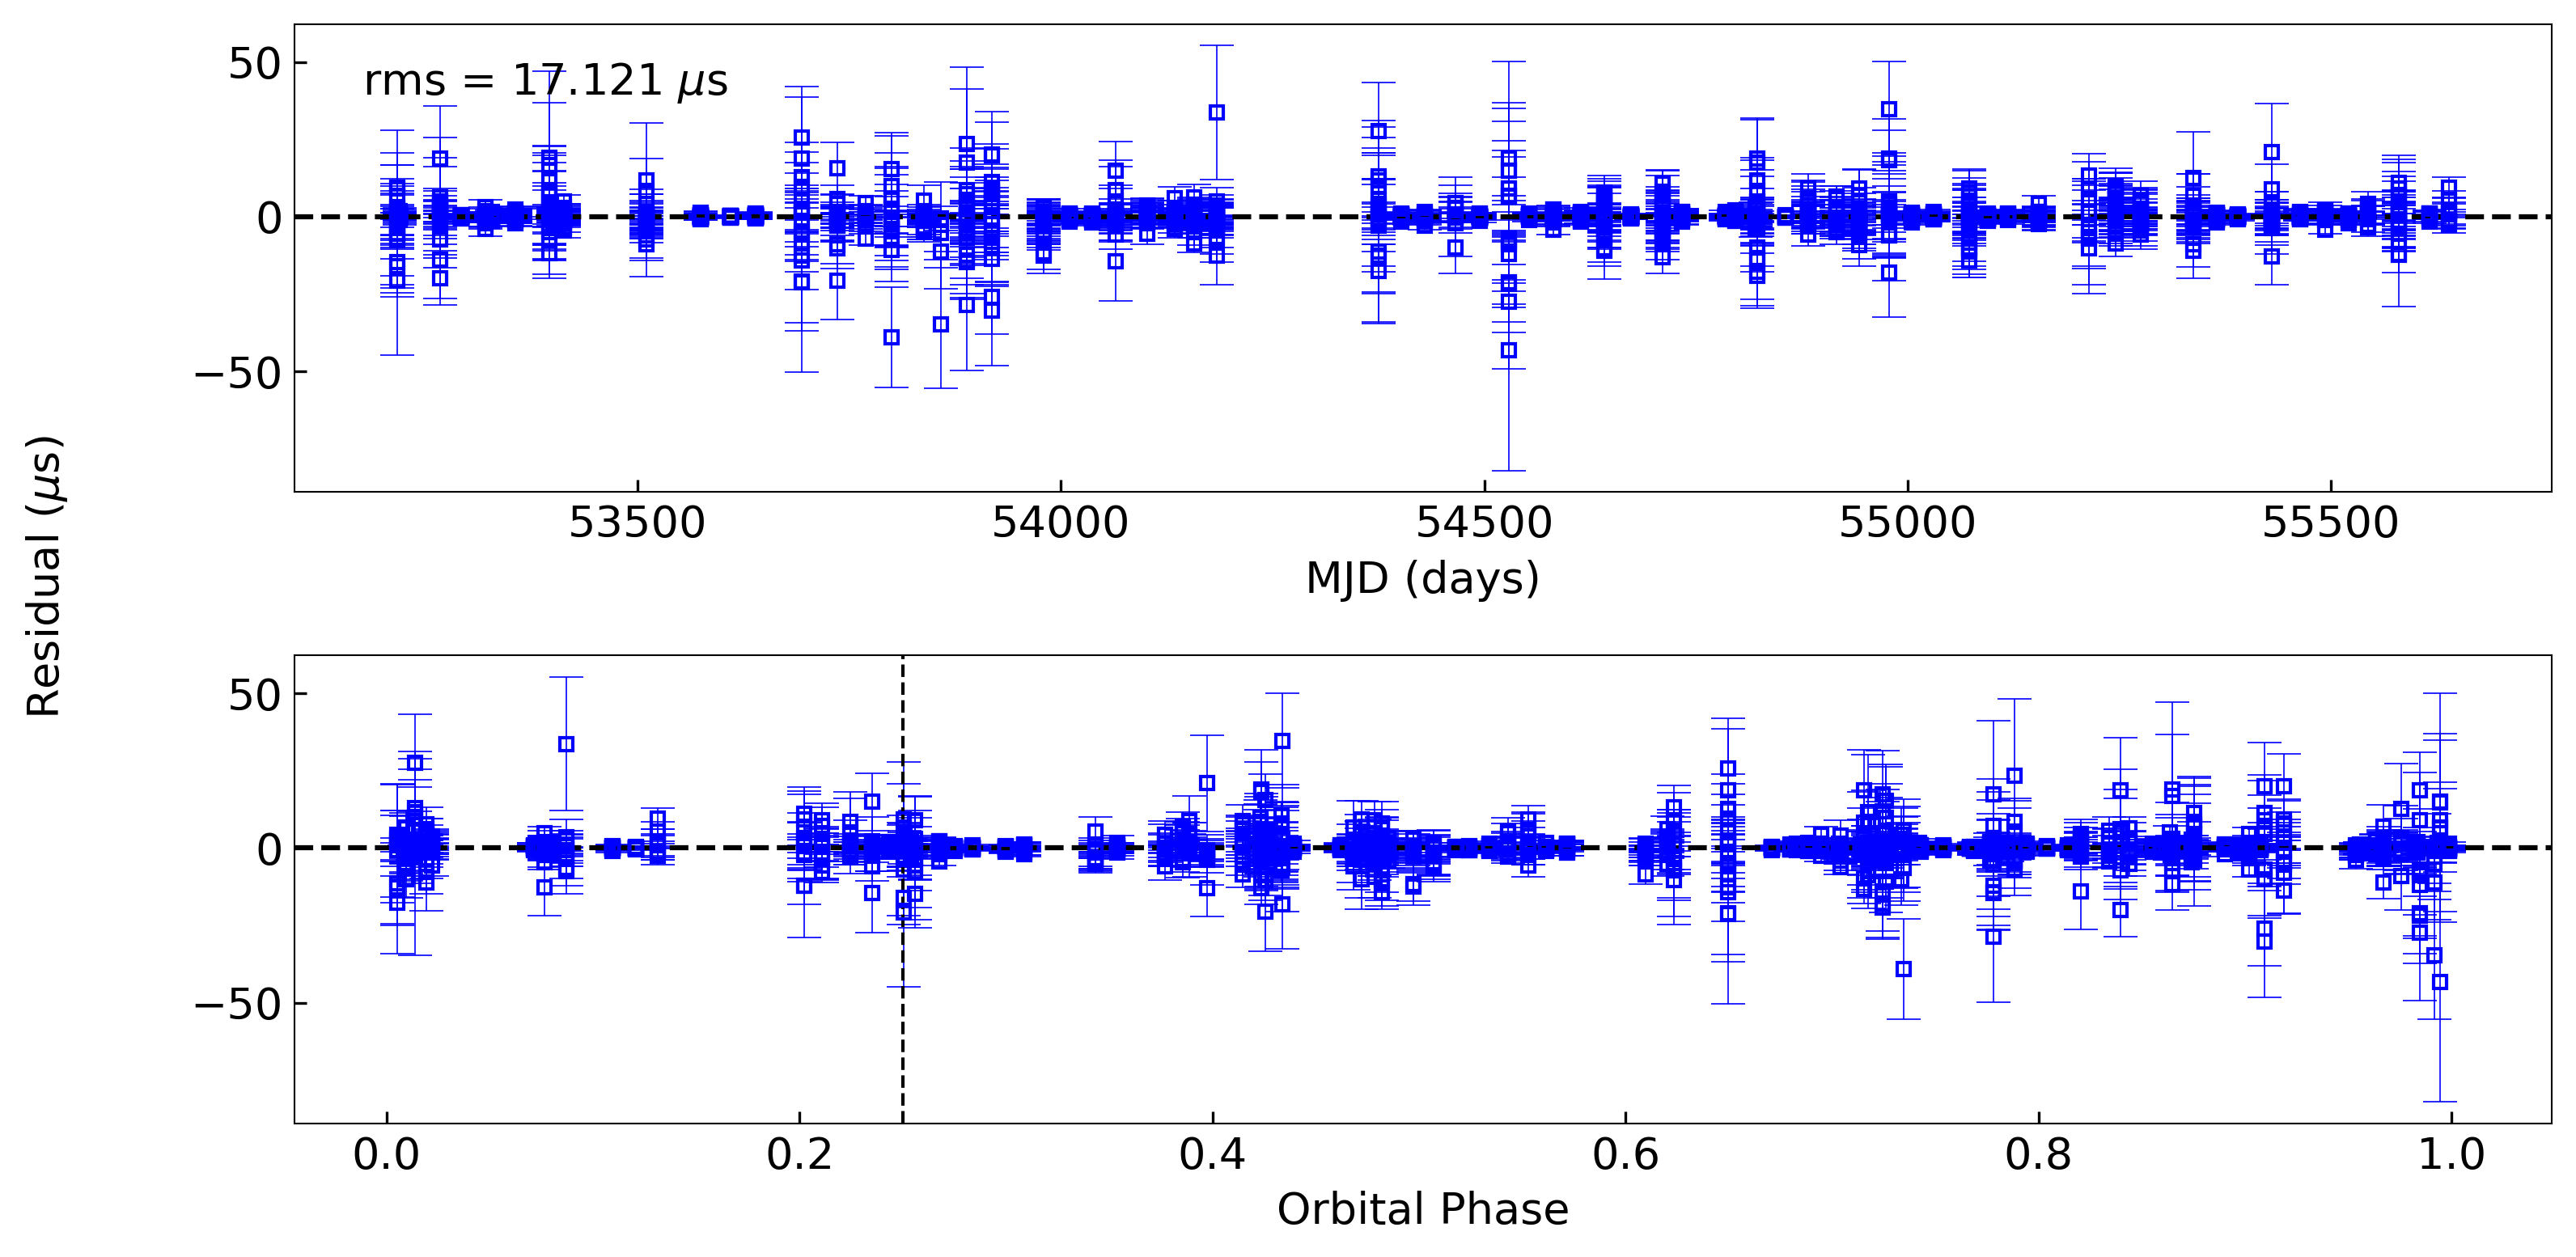

In [47]:
# 另一种残差图
fig = plt.figure(figsize=(12, 6), dpi=300)

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.35)

mjd_ax1   = fig.add_subplot(gs[0])
phase_ax2 = fig.add_subplot(gs[1])

# 拟合后残差 vs MJD
plt.sca(mjd_ax1)
plt.errorbar(
    xt.value,
    f.resids.time_resids.to_value(u.us),
    t.get_errors().to_value(u.us),
    fmt="s",
    mfc='none',          # 空心
    mec='blue',          # marker 边框
    color='blue',        # 误差条颜色
    capsize=5,
    elinewidth=0.4,
    capthick=0.4,
    markersize=4)

plt.xlabel("MJD (days)", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)
plt.axhline(0, color='k', linestyle='--')
mjd_ax1.tick_params(axis='both', direction='in')

# RMS 标注
mjd_ax1.text(
    0.03, 0.85,
    r"rms = 17.121 $\mu$s",
    transform=mjd_ax1.transAxes,
    fontsize=13)

# 拟合后残差 vs Orbital Phase
plt.sca(phase_ax2)
plt.errorbar(
    f.model.orbital_phase(t.get_mjds()) / (2 * np.pi),
    f.resids.time_resids.to_value(u.us),
    t.get_errors().to_value(u.us),
    fmt="s",
    mfc='none',
    mec='blue',
    color='blue',
    capsize=5,
    elinewidth=0.4,
    capthick=0.4,
    markersize=4)

plt.xlabel("Orbital Phase", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)
plt.axhline(0, color='k', linestyle='--')
phase_ax2.tick_params(axis='both', direction='in')

# 掩食相位（x=0.25）
phase_ax2.axvline(0.25, color='black', linestyle='--', lw=1)

fig.text(
    0.04, 0.5,
    r"Residual ($\mu$s)",
    va='center',
    ha='center',
    rotation='vertical',
    fontsize=13)

plt.show()